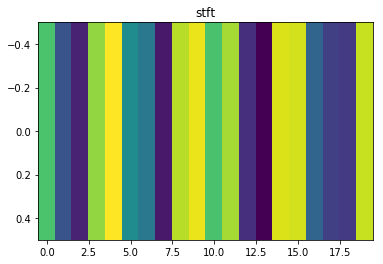

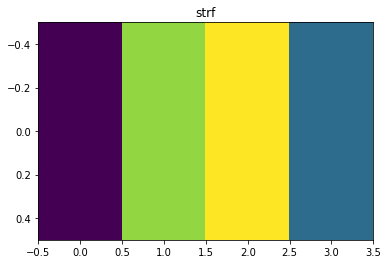

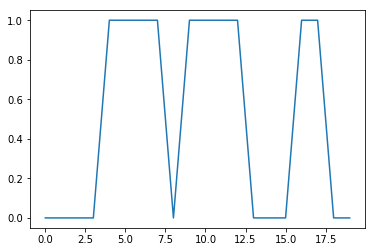

In [77]:
#### Toy test on binary ###

import scipy.io.wavfile as wavefile
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt
import math

#import os
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
#os.environ["CUDA_VISIBLE_DEVICES"] = ""


from keras.models import Sequential
from keras.layers import Conv1D,Dense,Conv2D
from keras.layers import Activation, Dense
from keras.constraints import non_neg
import keras.initializers as initializers
import keras.optimizers as optimizers


### STFT ###
nbFbins = 1
num = 20
time_window = 4

stft = np.random.rand(nbFbins,num)
plt.imshow(stft,aspect='auto')
plt.title('stft')

### STRF ###
strf = np.random.rand(nbFbins,time_window)
strf = np.fliplr(strf)
plt.figure()
plt.imshow(strf,aspect='auto')
plt.title('strf')

### Convolution ###
for fbin in range(np.shape(stft)[0]):
    if fbin==0:
        conved = signal.convolve(stft[fbin,:],strf[fbin,:],method='direct',mode='full')
    else:
        conved += signal.convolve(stft[fbin,:],strf[fbin,:],method='direct',mode='full')
conved = conved[0:num]

conved = conved - np.mean(conved)

def sigmoid(x):
  return 1 / (1 + math.exp(-x))
vsigmoid = np.vectorize(sigmoid)

conved = vsigmoid(conved)
#print(conved.shap)
conved = conved>=0.5

plt.figure()
plt.plot(conved)


In [78]:
#### Train Conv Network ####
X = np.atleast_3d(stft)
X = X.swapaxes(0,2)

Y = np.atleast_3d(conved)
Y = Y.swapaxes(0,2)
    
model = Sequential()
layer = Conv1D(input_shape=(np.shape(X)[1:3]),filters=1,kernel_size=time_window,strides=1,
                   padding='causal',dilation_rate=1,activation = 'relu',use_bias=True) 
    
layer.kernel_initializer = initializers.RandomUniform(minval=0, maxval=0.05, seed=None)

    
model.add(layer)
    
#sgd = optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer='sgd')
#model.compile(loss='poisson', optimizer='sgd')

# Fit the model
history = model.fit(X, Y, epochs=8000)




#### Train Conv Network ####
X = np.atleast_3d(stft)
X = X.swapaxes(0,2)

Y = np.atleast_3d(conved)
Y = Y.swapaxes(0,2)
    
model2 = Sequential()
layer2 = Conv1D(input_shape=(np.shape(X)[1:3]),filters=1,kernel_size=time_window,strides=1,
                   padding='causal',dilation_rate=1,activation = 'relu',use_bias=True) 
    
layer2.kernel_initializer = initializers.RandomUniform(minval=0, maxval=0.05, seed=None)

    
model2.add(layer2)
    
#sgd = optimizers.SGD(lr=0.1)
#model.compile(loss='mean_squared_error', optimizer='sgd')
model2.compile(loss='poisson', optimizer='sgd')

# Fit the model
history2 = model2.fit(X, Y, epochs=8000)

Epoch 1/8000
1/1 [==============================] - 0s 258ms/step - loss: 0.4562
Epoch 2/8000
1/1 [==============================] - 0s 869us/step - loss: 0.4349
Epoch 3/8000
1/1 [==============================] - 0s 641us/step - loss: 0.4153
Epoch 4/8000
1/1 [==============================] - 0s 556us/step - loss: 0.3971
Epoch 5/8000
1/1 [==============================] - 0s 605us/step - loss: 0.3804
Epoch 6/8000
1/1 [==============================] - 0s 608us/step - loss: 0.3650
Epoch 7/8000
1/1 [==============================] - 0s 559us/step - loss: 0.3508
Epoch 8/8000
1/1 [==============================] - 0s 540us/step - loss: 0.3376
Epoch 9/8000
1/1 [==============================] - 0s 634us/step - loss: 0.3255
Epoch 10/8000
1/1 [==============================] - 0s 614us/step - loss: 0.3143
Epoch 11/8000
1/1 [==============================] - 0s 594us/step - loss: 0.3040
Epoch 12/8000
1/1 [==============================] - 0s 602us/step - loss: 0.2945
Epoch 13/8000
1/1 [======

Epoch 102/8000
1/1 [==============================] - 0s 525us/step - loss: 0.1520
Epoch 103/8000
1/1 [==============================] - 0s 566us/step - loss: 0.1516
Epoch 104/8000
1/1 [==============================] - 0s 583us/step - loss: 0.1513
Epoch 105/8000
1/1 [==============================] - 0s 566us/step - loss: 0.1510
Epoch 106/8000
1/1 [==============================] - 0s 573us/step - loss: 0.1506
Epoch 107/8000
1/1 [==============================] - 0s 611us/step - loss: 0.1503
Epoch 108/8000
1/1 [==============================] - 0s 594us/step - loss: 0.1500
Epoch 109/8000
1/1 [==============================] - 0s 604us/step - loss: 0.1497
Epoch 110/8000
1/1 [==============================] - 0s 569us/step - loss: 0.1493
Epoch 111/8000
1/1 [==============================] - 0s 596us/step - loss: 0.1490
Epoch 112/8000
1/1 [==============================] - 0s 558us/step - loss: 0.1487
Epoch 113/8000
1/1 [==============================] - 0s 655us/step - loss: 0.1484
Epoc

Epoch 201/8000
1/1 [==============================] - 0s 776us/step - loss: 0.1263
Epoch 202/8000
1/1 [==============================] - 0s 819us/step - loss: 0.1261
Epoch 203/8000
1/1 [==============================] - 0s 616us/step - loss: 0.1259
Epoch 204/8000
1/1 [==============================] - 0s 586us/step - loss: 0.1257
Epoch 205/8000
1/1 [==============================] - 0s 586us/step - loss: 0.1255
Epoch 206/8000
1/1 [==============================] - 0s 627us/step - loss: 0.1253
Epoch 207/8000
1/1 [==============================] - 0s 582us/step - loss: 0.1251
Epoch 208/8000
1/1 [==============================] - 0s 569us/step - loss: 0.1250
Epoch 209/8000
1/1 [==============================] - 0s 576us/step - loss: 0.1248
Epoch 210/8000
1/1 [==============================] - 0s 604us/step - loss: 0.1246
Epoch 211/8000
1/1 [==============================] - 0s 585us/step - loss: 0.1244
Epoch 212/8000
1/1 [==============================] - 0s 610us/step - loss: 0.1242
Epoc

Epoch 300/8000
1/1 [==============================] - 0s 616us/step - loss: 0.1109
Epoch 301/8000
1/1 [==============================] - 0s 572us/step - loss: 0.1107
Epoch 302/8000
1/1 [==============================] - 0s 636us/step - loss: 0.1106
Epoch 303/8000
1/1 [==============================] - 0s 587us/step - loss: 0.1105
Epoch 304/8000
1/1 [==============================] - 0s 597us/step - loss: 0.1104
Epoch 305/8000
1/1 [==============================] - 0s 580us/step - loss: 0.1102
Epoch 306/8000
1/1 [==============================] - 0s 583us/step - loss: 0.1101
Epoch 307/8000
1/1 [==============================] - 0s 565us/step - loss: 0.1100
Epoch 308/8000
1/1 [==============================] - 0s 583us/step - loss: 0.1099
Epoch 309/8000
1/1 [==============================] - 0s 587us/step - loss: 0.1098
Epoch 310/8000
1/1 [==============================] - 0s 555us/step - loss: 0.1097
Epoch 311/8000
1/1 [==============================] - 0s 570us/step - loss: 0.1095
Epoc

Epoch 399/8000
1/1 [==============================] - 0s 586us/step - loss: 0.1009
Epoch 400/8000
1/1 [==============================] - 0s 691us/step - loss: 0.1008
Epoch 401/8000
1/1 [==============================] - 0s 548us/step - loss: 0.1008
Epoch 402/8000
1/1 [==============================] - 0s 532us/step - loss: 0.1007
Epoch 403/8000
1/1 [==============================] - 0s 552us/step - loss: 0.1006
Epoch 404/8000
1/1 [==============================] - 0s 626us/step - loss: 0.1005
Epoch 405/8000
1/1 [==============================] - 0s 574us/step - loss: 0.1004
Epoch 406/8000
1/1 [==============================] - 0s 604us/step - loss: 0.1003
Epoch 407/8000
1/1 [==============================] - 0s 552us/step - loss: 0.1003
Epoch 408/8000
1/1 [==============================] - 0s 592us/step - loss: 0.1002
Epoch 409/8000
1/1 [==============================] - 0s 661us/step - loss: 0.1001
Epoch 410/8000
1/1 [==============================] - 0s 672us/step - loss: 0.1000
Epoc

Epoch 498/8000
1/1 [==============================] - 0s 582us/step - loss: 0.0938
Epoch 499/8000
1/1 [==============================] - 0s 603us/step - loss: 0.0937
Epoch 500/8000
1/1 [==============================] - 0s 604us/step - loss: 0.0936
Epoch 501/8000
1/1 [==============================] - 0s 697us/step - loss: 0.0936
Epoch 502/8000
1/1 [==============================] - 0s 639us/step - loss: 0.0935
Epoch 503/8000
1/1 [==============================] - 0s 602us/step - loss: 0.0934
Epoch 504/8000
1/1 [==============================] - 0s 577us/step - loss: 0.0934
Epoch 505/8000
1/1 [==============================] - 0s 636us/step - loss: 0.0933
Epoch 506/8000
1/1 [==============================] - 0s 599us/step - loss: 0.0933
Epoch 507/8000
1/1 [==============================] - 0s 588us/step - loss: 0.0932
Epoch 508/8000
1/1 [==============================] - 0s 630us/step - loss: 0.0931
Epoch 509/8000
1/1 [==============================] - 0s 640us/step - loss: 0.0931
Epoc

Epoch 597/8000
1/1 [==============================] - 0s 576us/step - loss: 0.0882
Epoch 598/8000
1/1 [==============================] - 0s 581us/step - loss: 0.0882
Epoch 599/8000
1/1 [==============================] - 0s 635us/step - loss: 0.0881
Epoch 600/8000
1/1 [==============================] - 0s 619us/step - loss: 0.0881
Epoch 601/8000
1/1 [==============================] - 0s 584us/step - loss: 0.0880
Epoch 602/8000
1/1 [==============================] - 0s 572us/step - loss: 0.0880
Epoch 603/8000
1/1 [==============================] - 0s 648us/step - loss: 0.0879
Epoch 604/8000
1/1 [==============================] - 0s 703us/step - loss: 0.0879
Epoch 605/8000
1/1 [==============================] - 0s 581us/step - loss: 0.0878
Epoch 606/8000
1/1 [==============================] - 0s 549us/step - loss: 0.0878
Epoch 607/8000
1/1 [==============================] - 0s 602us/step - loss: 0.0877
Epoch 608/8000
1/1 [==============================] - 0s 654us/step - loss: 0.0877
Epoc

Epoch 696/8000
1/1 [==============================] - 0s 611us/step - loss: 0.0837
Epoch 697/8000
1/1 [==============================] - 0s 655us/step - loss: 0.0837
Epoch 698/8000
1/1 [==============================] - 0s 596us/step - loss: 0.0837
Epoch 699/8000
1/1 [==============================] - 0s 606us/step - loss: 0.0836
Epoch 700/8000
1/1 [==============================] - 0s 607us/step - loss: 0.0836
Epoch 701/8000
1/1 [==============================] - 0s 662us/step - loss: 0.0835
Epoch 702/8000
1/1 [==============================] - 0s 631us/step - loss: 0.0835
Epoch 703/8000
1/1 [==============================] - 0s 634us/step - loss: 0.0835
Epoch 704/8000
1/1 [==============================] - 0s 601us/step - loss: 0.0834
Epoch 705/8000
1/1 [==============================] - 0s 690us/step - loss: 0.0834
Epoch 706/8000
1/1 [==============================] - 0s 611us/step - loss: 0.0833
Epoch 707/8000
1/1 [==============================] - 0s 589us/step - loss: 0.0833
Epoc

Epoch 795/8000
1/1 [==============================] - 0s 603us/step - loss: 0.0801
Epoch 796/8000
1/1 [==============================] - 0s 628us/step - loss: 0.0801
Epoch 797/8000
1/1 [==============================] - 0s 612us/step - loss: 0.0800
Epoch 798/8000
1/1 [==============================] - 0s 599us/step - loss: 0.0800
Epoch 799/8000
1/1 [==============================] - 0s 688us/step - loss: 0.0799
Epoch 800/8000
1/1 [==============================] - 0s 687us/step - loss: 0.0799
Epoch 801/8000
1/1 [==============================] - 0s 691us/step - loss: 0.0799
Epoch 802/8000
1/1 [==============================] - 0s 682us/step - loss: 0.0798
Epoch 803/8000
1/1 [==============================] - 0s 664us/step - loss: 0.0798
Epoch 804/8000
1/1 [==============================] - 0s 691us/step - loss: 0.0798
Epoch 805/8000
1/1 [==============================] - 0s 632us/step - loss: 0.0797
Epoch 806/8000
1/1 [==============================] - 0s 638us/step - loss: 0.0797
Epoc

Epoch 894/8000
1/1 [==============================] - 0s 594us/step - loss: 0.0770
Epoch 895/8000
1/1 [==============================] - 0s 648us/step - loss: 0.0770
Epoch 896/8000
1/1 [==============================] - 0s 695us/step - loss: 0.0770
Epoch 897/8000
1/1 [==============================] - 0s 620us/step - loss: 0.0769
Epoch 898/8000
1/1 [==============================] - 0s 663us/step - loss: 0.0769
Epoch 899/8000
1/1 [==============================] - 0s 736us/step - loss: 0.0769
Epoch 900/8000
1/1 [==============================] - 0s 757us/step - loss: 0.0768
Epoch 901/8000
1/1 [==============================] - 0s 751us/step - loss: 0.0768
Epoch 902/8000
1/1 [==============================] - 0s 746us/step - loss: 0.0768
Epoch 903/8000
1/1 [==============================] - 0s 760us/step - loss: 0.0768
Epoch 904/8000
1/1 [==============================] - 0s 727us/step - loss: 0.0767
Epoch 905/8000
1/1 [==============================] - 0s 754us/step - loss: 0.0767
Epoc

Epoch 993/8000
1/1 [==============================] - 0s 604us/step - loss: 0.0744
Epoch 994/8000
1/1 [==============================] - 0s 619us/step - loss: 0.0744
Epoch 995/8000
1/1 [==============================] - 0s 620us/step - loss: 0.0744
Epoch 996/8000
1/1 [==============================] - 0s 639us/step - loss: 0.0743
Epoch 997/8000
1/1 [==============================] - 0s 620us/step - loss: 0.0743
Epoch 998/8000
1/1 [==============================] - 0s 649us/step - loss: 0.0743
Epoch 999/8000
1/1 [==============================] - 0s 879us/step - loss: 0.0743
Epoch 1000/8000
1/1 [==============================] - 0s 797us/step - loss: 0.0742
Epoch 1001/8000
1/1 [==============================] - 0s 667us/step - loss: 0.0742
Epoch 1002/8000
1/1 [==============================] - 0s 715us/step - loss: 0.0742
Epoch 1003/8000
1/1 [==============================] - 0s 700us/step - loss: 0.0742
Epoch 1004/8000
1/1 [==============================] - 0s 668us/step - loss: 0.0741

Epoch 1091/8000
1/1 [==============================] - 0s 905us/step - loss: 0.0722
Epoch 1092/8000
1/1 [==============================] - 0s 872us/step - loss: 0.0722
Epoch 1093/8000
1/1 [==============================] - 0s 858us/step - loss: 0.0721
Epoch 1094/8000
1/1 [==============================] - 0s 858us/step - loss: 0.0721
Epoch 1095/8000
1/1 [==============================] - 0s 872us/step - loss: 0.0721
Epoch 1096/8000
1/1 [==============================] - 0s 855us/step - loss: 0.0721
Epoch 1097/8000
1/1 [==============================] - 0s 859us/step - loss: 0.0721
Epoch 1098/8000
1/1 [==============================] - 0s 897us/step - loss: 0.0720
Epoch 1099/8000
1/1 [==============================] - 0s 880us/step - loss: 0.0720
Epoch 1100/8000
1/1 [==============================] - 0s 850us/step - loss: 0.0720
Epoch 1101/8000
1/1 [==============================] - 0s 830us/step - loss: 0.0720
Epoch 1102/8000
1/1 [==============================] - 0s 925us/step - loss:

Epoch 1189/8000
1/1 [==============================] - 0s 865us/step - loss: 0.0703
Epoch 1190/8000
1/1 [==============================] - 0s 904us/step - loss: 0.0703
Epoch 1191/8000
1/1 [==============================] - 0s 884us/step - loss: 0.0703
Epoch 1192/8000
1/1 [==============================] - 0s 881us/step - loss: 0.0702
Epoch 1193/8000
1/1 [==============================] - 0s 823us/step - loss: 0.0702
Epoch 1194/8000
1/1 [==============================] - 0s 873us/step - loss: 0.0702
Epoch 1195/8000
1/1 [==============================] - 0s 810us/step - loss: 0.0702
Epoch 1196/8000
1/1 [==============================] - 0s 810us/step - loss: 0.0702
Epoch 1197/8000
1/1 [==============================] - 0s 880us/step - loss: 0.0701
Epoch 1198/8000
1/1 [==============================] - 0s 885us/step - loss: 0.0701
Epoch 1199/8000
1/1 [==============================] - 0s 964us/step - loss: 0.0701
Epoch 1200/8000
1/1 [==============================] - 0s 886us/step - loss:

Epoch 1287/8000
1/1 [==============================] - 0s 609us/step - loss: 0.0686
Epoch 1288/8000
1/1 [==============================] - 0s 563us/step - loss: 0.0686
Epoch 1289/8000
1/1 [==============================] - 0s 666us/step - loss: 0.0686
Epoch 1290/8000
1/1 [==============================] - 0s 601us/step - loss: 0.0686
Epoch 1291/8000
1/1 [==============================] - 0s 733us/step - loss: 0.0686
Epoch 1292/8000
1/1 [==============================] - 0s 612us/step - loss: 0.0686
Epoch 1293/8000
1/1 [==============================] - 0s 608us/step - loss: 0.0685
Epoch 1294/8000
1/1 [==============================] - 0s 602us/step - loss: 0.0685
Epoch 1295/8000
1/1 [==============================] - 0s 615us/step - loss: 0.0685
Epoch 1296/8000
1/1 [==============================] - 0s 627us/step - loss: 0.0685
Epoch 1297/8000
1/1 [==============================] - 0s 592us/step - loss: 0.0685
Epoch 1298/8000
1/1 [==============================] - 0s 552us/step - loss:

Epoch 1385/8000
1/1 [==============================] - 0s 625us/step - loss: 0.0672
Epoch 1386/8000
1/1 [==============================] - 0s 603us/step - loss: 0.0672
Epoch 1387/8000
1/1 [==============================] - 0s 555us/step - loss: 0.0672
Epoch 1388/8000
1/1 [==============================] - 0s 570us/step - loss: 0.0672
Epoch 1389/8000
1/1 [==============================] - 0s 605us/step - loss: 0.0672
Epoch 1390/8000
1/1 [==============================] - 0s 640us/step - loss: 0.0672
Epoch 1391/8000
1/1 [==============================] - 0s 589us/step - loss: 0.0671
Epoch 1392/8000
1/1 [==============================] - 0s 615us/step - loss: 0.0671
Epoch 1393/8000
1/1 [==============================] - 0s 776us/step - loss: 0.0671
Epoch 1394/8000
1/1 [==============================] - 0s 623us/step - loss: 0.0671
Epoch 1395/8000
1/1 [==============================] - 0s 617us/step - loss: 0.0671
Epoch 1396/8000
1/1 [==============================] - 0s 628us/step - loss:

Epoch 1483/8000
1/1 [==============================] - 0s 647us/step - loss: 0.0660
Epoch 1484/8000
1/1 [==============================] - 0s 631us/step - loss: 0.0660
Epoch 1485/8000
1/1 [==============================] - 0s 608us/step - loss: 0.0660
Epoch 1486/8000
1/1 [==============================] - 0s 578us/step - loss: 0.0659
Epoch 1487/8000
1/1 [==============================] - 0s 635us/step - loss: 0.0659
Epoch 1488/8000
1/1 [==============================] - 0s 647us/step - loss: 0.0659
Epoch 1489/8000
1/1 [==============================] - 0s 8ms/step - loss: 0.0659
Epoch 1490/8000
1/1 [==============================] - 0s 672us/step - loss: 0.0659
Epoch 1491/8000
1/1 [==============================] - 0s 601us/step - loss: 0.0659
Epoch 1492/8000
1/1 [==============================] - 0s 615us/step - loss: 0.0659
Epoch 1493/8000
1/1 [==============================] - 0s 669us/step - loss: 0.0659
Epoch 1494/8000
1/1 [==============================] - 0s 810us/step - loss: 0

Epoch 1581/8000
1/1 [==============================] - 0s 732us/step - loss: 0.0649
Epoch 1582/8000
1/1 [==============================] - 0s 661us/step - loss: 0.0649
Epoch 1583/8000
1/1 [==============================] - 0s 649us/step - loss: 0.0649
Epoch 1584/8000
1/1 [==============================] - 0s 655us/step - loss: 0.0649
Epoch 1585/8000
1/1 [==============================] - 0s 762us/step - loss: 0.0649
Epoch 1586/8000
1/1 [==============================] - 0s 688us/step - loss: 0.0649
Epoch 1587/8000
1/1 [==============================] - 0s 660us/step - loss: 0.0648
Epoch 1588/8000
1/1 [==============================] - 0s 623us/step - loss: 0.0648
Epoch 1589/8000
1/1 [==============================] - 0s 688us/step - loss: 0.0648
Epoch 1590/8000
1/1 [==============================] - 0s 625us/step - loss: 0.0648
Epoch 1591/8000
1/1 [==============================] - 0s 651us/step - loss: 0.0648
Epoch 1592/8000
1/1 [==============================] - 0s 624us/step - loss:

Epoch 1679/8000
1/1 [==============================] - 0s 601us/step - loss: 0.0640
Epoch 1680/8000
1/1 [==============================] - 0s 694us/step - loss: 0.0640
Epoch 1681/8000
1/1 [==============================] - 0s 582us/step - loss: 0.0640
Epoch 1682/8000
1/1 [==============================] - 0s 560us/step - loss: 0.0639
Epoch 1683/8000
1/1 [==============================] - 0s 649us/step - loss: 0.0639
Epoch 1684/8000
1/1 [==============================] - 0s 753us/step - loss: 0.0639
Epoch 1685/8000
1/1 [==============================] - 0s 731us/step - loss: 0.0639
Epoch 1686/8000
1/1 [==============================] - 0s 728us/step - loss: 0.0639
Epoch 1687/8000
1/1 [==============================] - 0s 648us/step - loss: 0.0639
Epoch 1688/8000
1/1 [==============================] - 0s 655us/step - loss: 0.0639
Epoch 1689/8000
1/1 [==============================] - 0s 678us/step - loss: 0.0639
Epoch 1690/8000
1/1 [==============================] - 0s 671us/step - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 596us/step - loss: 0.0586
Epoch 2864/8000
1/1 [==============================] - 0s 592us/step - loss: 0.0586
Epoch 2865/8000
1/1 [==============================] - 0s 603us/step - loss: 0.0586
Epoch 2866/8000
1/1 [==============================] - 0s 566us/step - loss: 0.0586
Epoch 2867/8000
1/1 [==============================] - 0s 601us/step - loss: 0.0586
Epoch 2868/8000
1/1 [==============================] - 0s 562us/step - loss: 0.0586
Epoch 2869/8000
1/1 [==============================] - 0s 618us/step - loss: 0.0586
Epoch 2870/8000
1/1 [==============================] - 0s 583us/step - loss: 0.0586
Epoch 2871/8000
1/1 [==============================] - 0s 590us/step - loss: 0.0586
Epoch 2872/8000
1/1 [==============================] - 0s 596us/step - loss: 0.0586
Epoch 2873/8000
1/1 [==============================] - 0s 687us/step - loss: 0.0586
Epoch 2874/8000
1/1 [==============================] - 0s 612us/step - loss: 0.0586
Epoch 28

Epoch 2961/8000
1/1 [==============================] - 0s 651us/step - loss: 0.0585
Epoch 2962/8000
1/1 [==============================] - 0s 631us/step - loss: 0.0585
Epoch 2963/8000
1/1 [==============================] - 0s 621us/step - loss: 0.0585
Epoch 2964/8000
1/1 [==============================] - 0s 548us/step - loss: 0.0585
Epoch 2965/8000
1/1 [==============================] - 0s 631us/step - loss: 0.0585
Epoch 2966/8000
1/1 [==============================] - 0s 598us/step - loss: 0.0584
Epoch 2967/8000
1/1 [==============================] - 0s 597us/step - loss: 0.0584
Epoch 2968/8000
1/1 [==============================] - 0s 642us/step - loss: 0.0584
Epoch 2969/8000
1/1 [==============================] - 0s 659us/step - loss: 0.0584
Epoch 2970/8000
1/1 [==============================] - 0s 580us/step - loss: 0.0584
Epoch 2971/8000
1/1 [==============================] - 0s 605us/step - loss: 0.0584
Epoch 2972/8000
1/1 [==============================] - 0s 631us/step - loss:

Epoch 3059/8000
1/1 [==============================] - 0s 638us/step - loss: 0.0583
Epoch 3060/8000
1/1 [==============================] - 0s 669us/step - loss: 0.0583
Epoch 3061/8000
1/1 [==============================] - 0s 628us/step - loss: 0.0583
Epoch 3062/8000
1/1 [==============================] - 0s 581us/step - loss: 0.0583
Epoch 3063/8000
1/1 [==============================] - 0s 603us/step - loss: 0.0583
Epoch 3064/8000
1/1 [==============================] - 0s 573us/step - loss: 0.0583
Epoch 3065/8000
1/1 [==============================] - 0s 597us/step - loss: 0.0583
Epoch 3066/8000
1/1 [==============================] - 0s 681us/step - loss: 0.0583
Epoch 3067/8000
1/1 [==============================] - 0s 625us/step - loss: 0.0583
Epoch 3068/8000
1/1 [==============================] - 0s 540us/step - loss: 0.0583
Epoch 3069/8000
1/1 [==============================] - 0s 582us/step - loss: 0.0583
Epoch 3070/8000
1/1 [==============================] - 0s 622us/step - loss:

Epoch 3157/8000
1/1 [==============================] - 0s 619us/step - loss: 0.0582
Epoch 3158/8000
1/1 [==============================] - 0s 660us/step - loss: 0.0582
Epoch 3159/8000
1/1 [==============================] - 0s 597us/step - loss: 0.0582
Epoch 3160/8000
1/1 [==============================] - 0s 657us/step - loss: 0.0582
Epoch 3161/8000
1/1 [==============================] - 0s 597us/step - loss: 0.0582
Epoch 3162/8000
1/1 [==============================] - 0s 596us/step - loss: 0.0582
Epoch 3163/8000
1/1 [==============================] - 0s 606us/step - loss: 0.0582
Epoch 3164/8000
1/1 [==============================] - 0s 659us/step - loss: 0.0582
Epoch 3165/8000
1/1 [==============================] - 0s 580us/step - loss: 0.0582
Epoch 3166/8000
1/1 [==============================] - 0s 573us/step - loss: 0.0582
Epoch 3167/8000
1/1 [==============================] - 0s 651us/step - loss: 0.0582
Epoch 3168/8000
1/1 [==============================] - 0s 580us/step - loss:

Epoch 3255/8000
1/1 [==============================] - 0s 582us/step - loss: 0.0581
Epoch 3256/8000
1/1 [==============================] - 0s 628us/step - loss: 0.0581
Epoch 3257/8000
1/1 [==============================] - 0s 735us/step - loss: 0.0581
Epoch 3258/8000
1/1 [==============================] - 0s 585us/step - loss: 0.0581
Epoch 3259/8000
1/1 [==============================] - 0s 670us/step - loss: 0.0581
Epoch 3260/8000
1/1 [==============================] - 0s 622us/step - loss: 0.0581
Epoch 3261/8000
1/1 [==============================] - 0s 637us/step - loss: 0.0581
Epoch 3262/8000
1/1 [==============================] - 0s 631us/step - loss: 0.0580
Epoch 3263/8000
1/1 [==============================] - 0s 767us/step - loss: 0.0580
Epoch 3264/8000
1/1 [==============================] - 0s 597us/step - loss: 0.0580
Epoch 3265/8000
1/1 [==============================] - 0s 674us/step - loss: 0.0580
Epoch 3266/8000
1/1 [==============================] - 0s 736us/step - loss:

Epoch 3353/8000
1/1 [==============================] - 0s 618us/step - loss: 0.0580
Epoch 3354/8000
1/1 [==============================] - 0s 690us/step - loss: 0.0580
Epoch 3355/8000
1/1 [==============================] - 0s 646us/step - loss: 0.0580
Epoch 3356/8000
1/1 [==============================] - 0s 604us/step - loss: 0.0580
Epoch 3357/8000
1/1 [==============================] - 0s 603us/step - loss: 0.0580
Epoch 3358/8000
1/1 [==============================] - 0s 601us/step - loss: 0.0579
Epoch 3359/8000
1/1 [==============================] - 0s 582us/step - loss: 0.0579
Epoch 3360/8000
1/1 [==============================] - 0s 596us/step - loss: 0.0579
Epoch 3361/8000
1/1 [==============================] - 0s 633us/step - loss: 0.0579
Epoch 3362/8000
1/1 [==============================] - 0s 634us/step - loss: 0.0579
Epoch 3363/8000
1/1 [==============================] - 0s 674us/step - loss: 0.0579
Epoch 3364/8000
1/1 [==============================] - 0s 652us/step - loss:

Epoch 3451/8000
1/1 [==============================] - 0s 628us/step - loss: 0.0579
Epoch 3452/8000
1/1 [==============================] - 0s 591us/step - loss: 0.0579
Epoch 3453/8000
1/1 [==============================] - 0s 548us/step - loss: 0.0579
Epoch 3454/8000
1/1 [==============================] - 0s 585us/step - loss: 0.0579
Epoch 3455/8000
1/1 [==============================] - 0s 597us/step - loss: 0.0579
Epoch 3456/8000
1/1 [==============================] - 0s 621us/step - loss: 0.0579
Epoch 3457/8000
1/1 [==============================] - 0s 597us/step - loss: 0.0579
Epoch 3458/8000
1/1 [==============================] - 0s 628us/step - loss: 0.0579
Epoch 3459/8000
1/1 [==============================] - 0s 604us/step - loss: 0.0579
Epoch 3460/8000
1/1 [==============================] - 0s 656us/step - loss: 0.0579
Epoch 3461/8000
1/1 [==============================] - 0s 645us/step - loss: 0.0579
Epoch 3462/8000
1/1 [==============================] - 0s 662us/step - loss:

Epoch 3549/8000
1/1 [==============================] - 0s 695us/step - loss: 0.0578
Epoch 3550/8000
1/1 [==============================] - 0s 587us/step - loss: 0.0578
Epoch 3551/8000
1/1 [==============================] - 0s 636us/step - loss: 0.0578
Epoch 3552/8000
1/1 [==============================] - 0s 722us/step - loss: 0.0578
Epoch 3553/8000
1/1 [==============================] - 0s 884us/step - loss: 0.0578
Epoch 3554/8000
1/1 [==============================] - 0s 757us/step - loss: 0.0578
Epoch 3555/8000
1/1 [==============================] - 0s 685us/step - loss: 0.0578
Epoch 3556/8000
1/1 [==============================] - 0s 654us/step - loss: 0.0578
Epoch 3557/8000
1/1 [==============================] - 0s 620us/step - loss: 0.0578
Epoch 3558/8000
1/1 [==============================] - 0s 643us/step - loss: 0.0578
Epoch 3559/8000
1/1 [==============================] - 0s 600us/step - loss: 0.0578
Epoch 3560/8000
1/1 [==============================] - 0s 607us/step - loss:

Epoch 3647/8000
1/1 [==============================] - 0s 571us/step - loss: 0.0577
Epoch 3648/8000
1/1 [==============================] - 0s 669us/step - loss: 0.0577
Epoch 3649/8000
1/1 [==============================] - 0s 639us/step - loss: 0.0577
Epoch 3650/8000
1/1 [==============================] - 0s 603us/step - loss: 0.0577
Epoch 3651/8000
1/1 [==============================] - 0s 597us/step - loss: 0.0577
Epoch 3652/8000
1/1 [==============================] - 0s 577us/step - loss: 0.0577
Epoch 3653/8000
1/1 [==============================] - 0s 691us/step - loss: 0.0577
Epoch 3654/8000
1/1 [==============================] - 0s 598us/step - loss: 0.0577
Epoch 3655/8000
1/1 [==============================] - 0s 665us/step - loss: 0.0577
Epoch 3656/8000
1/1 [==============================] - 0s 608us/step - loss: 0.0577
Epoch 3657/8000
1/1 [==============================] - 0s 589us/step - loss: 0.0577
Epoch 3658/8000
1/1 [==============================] - 0s 599us/step - loss:

Epoch 3745/8000
1/1 [==============================] - 0s 630us/step - loss: 0.0577
Epoch 3746/8000
1/1 [==============================] - 0s 723us/step - loss: 0.0577
Epoch 3747/8000
1/1 [==============================] - 0s 774us/step - loss: 0.0577
Epoch 3748/8000
1/1 [==============================] - 0s 626us/step - loss: 0.0577
Epoch 3749/8000
1/1 [==============================] - 0s 626us/step - loss: 0.0577
Epoch 3750/8000
1/1 [==============================] - 0s 655us/step - loss: 0.0577
Epoch 3751/8000
1/1 [==============================] - 0s 624us/step - loss: 0.0577
Epoch 3752/8000
1/1 [==============================] - 0s 563us/step - loss: 0.0576
Epoch 3753/8000
1/1 [==============================] - 0s 605us/step - loss: 0.0576
Epoch 3754/8000
1/1 [==============================] - 0s 619us/step - loss: 0.0576
Epoch 3755/8000
1/1 [==============================] - 0s 643us/step - loss: 0.0576
Epoch 3756/8000
1/1 [==============================] - 0s 716us/step - loss:

Epoch 3843/8000
1/1 [==============================] - 0s 640us/step - loss: 0.0576
Epoch 3844/8000
1/1 [==============================] - 0s 614us/step - loss: 0.0576
Epoch 3845/8000
1/1 [==============================] - 0s 579us/step - loss: 0.0576
Epoch 3846/8000
1/1 [==============================] - 0s 639us/step - loss: 0.0576
Epoch 3847/8000
1/1 [==============================] - 0s 711us/step - loss: 0.0576
Epoch 3848/8000
1/1 [==============================] - 0s 609us/step - loss: 0.0576
Epoch 3849/8000
1/1 [==============================] - 0s 593us/step - loss: 0.0576
Epoch 3850/8000
1/1 [==============================] - 0s 617us/step - loss: 0.0576
Epoch 3851/8000
1/1 [==============================] - 0s 581us/step - loss: 0.0576
Epoch 3852/8000
1/1 [==============================] - 0s 606us/step - loss: 0.0576
Epoch 3853/8000
1/1 [==============================] - 0s 620us/step - loss: 0.0576
Epoch 3854/8000
1/1 [==============================] - 0s 651us/step - loss:

Epoch 3941/8000
1/1 [==============================] - 0s 639us/step - loss: 0.0575
Epoch 3942/8000
1/1 [==============================] - 0s 622us/step - loss: 0.0575
Epoch 3943/8000
1/1 [==============================] - 0s 627us/step - loss: 0.0575
Epoch 3944/8000
1/1 [==============================] - 0s 627us/step - loss: 0.0575
Epoch 3945/8000
1/1 [==============================] - 0s 615us/step - loss: 0.0575
Epoch 3946/8000
1/1 [==============================] - 0s 669us/step - loss: 0.0575
Epoch 3947/8000
1/1 [==============================] - 0s 619us/step - loss: 0.0575
Epoch 3948/8000
1/1 [==============================] - 0s 644us/step - loss: 0.0575
Epoch 3949/8000
1/1 [==============================] - 0s 595us/step - loss: 0.0575
Epoch 3950/8000
1/1 [==============================] - 0s 606us/step - loss: 0.0575
Epoch 3951/8000
1/1 [==============================] - 0s 620us/step - loss: 0.0575
Epoch 3952/8000
1/1 [==============================] - 0s 607us/step - loss:

Epoch 4039/8000
1/1 [==============================] - 0s 646us/step - loss: 0.0575
Epoch 4040/8000
1/1 [==============================] - 0s 595us/step - loss: 0.0575
Epoch 4041/8000
1/1 [==============================] - 0s 609us/step - loss: 0.0575
Epoch 4042/8000
1/1 [==============================] - 0s 615us/step - loss: 0.0575
Epoch 4043/8000
1/1 [==============================] - 0s 569us/step - loss: 0.0575
Epoch 4044/8000
1/1 [==============================] - 0s 604us/step - loss: 0.0575
Epoch 4045/8000
1/1 [==============================] - 0s 629us/step - loss: 0.0575
Epoch 4046/8000
1/1 [==============================] - 0s 705us/step - loss: 0.0575
Epoch 4047/8000
1/1 [==============================] - 0s 624us/step - loss: 0.0575
Epoch 4048/8000
1/1 [==============================] - 0s 626us/step - loss: 0.0575
Epoch 4049/8000
1/1 [==============================] - 0s 618us/step - loss: 0.0575
Epoch 4050/8000
1/1 [==============================] - 0s 677us/step - loss:

Epoch 4137/8000
1/1 [==============================] - 0s 839us/step - loss: 0.0574
Epoch 4138/8000
1/1 [==============================] - 0s 848us/step - loss: 0.0574
Epoch 4139/8000
1/1 [==============================] - 0s 858us/step - loss: 0.0574
Epoch 4140/8000
1/1 [==============================] - 0s 813us/step - loss: 0.0574
Epoch 4141/8000
1/1 [==============================] - 0s 853us/step - loss: 0.0574
Epoch 4142/8000
1/1 [==============================] - 0s 846us/step - loss: 0.0574
Epoch 4143/8000
1/1 [==============================] - 0s 810us/step - loss: 0.0574
Epoch 4144/8000
1/1 [==============================] - 0s 916us/step - loss: 0.0574
Epoch 4145/8000
1/1 [==============================] - 0s 653us/step - loss: 0.0574
Epoch 4146/8000
1/1 [==============================] - 0s 602us/step - loss: 0.0574
Epoch 4147/8000
1/1 [==============================] - 0s 595us/step - loss: 0.0574
Epoch 4148/8000
1/1 [==============================] - 0s 592us/step - loss:

Epoch 4235/8000
1/1 [==============================] - 0s 666us/step - loss: 0.0574
Epoch 4236/8000
1/1 [==============================] - 0s 604us/step - loss: 0.0574
Epoch 4237/8000
1/1 [==============================] - 0s 606us/step - loss: 0.0574
Epoch 4238/8000
1/1 [==============================] - 0s 569us/step - loss: 0.0574
Epoch 4239/8000
1/1 [==============================] - 0s 653us/step - loss: 0.0574
Epoch 4240/8000
1/1 [==============================] - 0s 607us/step - loss: 0.0574
Epoch 4241/8000
1/1 [==============================] - 0s 641us/step - loss: 0.0574
Epoch 4242/8000
1/1 [==============================] - 0s 576us/step - loss: 0.0574
Epoch 4243/8000
1/1 [==============================] - 0s 628us/step - loss: 0.0574
Epoch 4244/8000
1/1 [==============================] - 0s 639us/step - loss: 0.0574
Epoch 4245/8000
1/1 [==============================] - 0s 646us/step - loss: 0.0574
Epoch 4246/8000
1/1 [==============================] - 0s 616us/step - loss:

Epoch 4333/8000
1/1 [==============================] - 0s 618us/step - loss: 0.0574
Epoch 4334/8000
1/1 [==============================] - 0s 594us/step - loss: 0.0574
Epoch 4335/8000
1/1 [==============================] - 0s 659us/step - loss: 0.0574
Epoch 4336/8000
1/1 [==============================] - 0s 612us/step - loss: 0.0574
Epoch 4337/8000
1/1 [==============================] - 0s 704us/step - loss: 0.0574
Epoch 4338/8000
1/1 [==============================] - 0s 630us/step - loss: 0.0574
Epoch 4339/8000
1/1 [==============================] - 0s 601us/step - loss: 0.0574
Epoch 4340/8000
1/1 [==============================] - 0s 612us/step - loss: 0.0574
Epoch 4341/8000
1/1 [==============================] - 0s 622us/step - loss: 0.0574
Epoch 4342/8000
1/1 [==============================] - 0s 563us/step - loss: 0.0574
Epoch 4343/8000
1/1 [==============================] - 0s 595us/step - loss: 0.0574
Epoch 4344/8000
1/1 [==============================] - 0s 679us/step - loss:

Epoch 4431/8000
1/1 [==============================] - 0s 652us/step - loss: 0.0573
Epoch 4432/8000
1/1 [==============================] - 0s 578us/step - loss: 0.0573
Epoch 4433/8000
1/1 [==============================] - 0s 590us/step - loss: 0.0573
Epoch 4434/8000
1/1 [==============================] - 0s 590us/step - loss: 0.0573
Epoch 4435/8000
1/1 [==============================] - 0s 695us/step - loss: 0.0573
Epoch 4436/8000
1/1 [==============================] - 0s 596us/step - loss: 0.0573
Epoch 4437/8000
1/1 [==============================] - 0s 680us/step - loss: 0.0573
Epoch 4438/8000
1/1 [==============================] - 0s 625us/step - loss: 0.0573
Epoch 4439/8000
1/1 [==============================] - 0s 646us/step - loss: 0.0573
Epoch 4440/8000
1/1 [==============================] - 0s 566us/step - loss: 0.0573
Epoch 4441/8000
1/1 [==============================] - 0s 621us/step - loss: 0.0573
Epoch 4442/8000
1/1 [==============================] - 0s 577us/step - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 575us/step - loss: 0.0570
Epoch 5761/8000
1/1 [==============================] - 0s 614us/step - loss: 0.0570
Epoch 5762/8000
1/1 [==============================] - 0s 624us/step - loss: 0.0570
Epoch 5763/8000
1/1 [==============================] - 0s 574us/step - loss: 0.0570
Epoch 5764/8000
1/1 [==============================] - 0s 648us/step - loss: 0.0570
Epoch 5765/8000
1/1 [==============================] - 0s 654us/step - loss: 0.0570
Epoch 5766/8000
1/1 [==============================] - 0s 659us/step - loss: 0.0570
Epoch 5767/8000
1/1 [==============================] - 0s 596us/step - loss: 0.0570
Epoch 5768/8000
1/1 [==============================] - 0s 586us/step - loss: 0.0570
Epoch 5769/8000
1/1 [==============================] - 0s 597us/step - loss: 0.0570
Epoch 5770/8000
1/1 [==============================] - 0s 590us/step - loss: 0.0570
Epoch 5771/8000
1/1 [==============================] - 0s 638us/step - loss: 0.0570
Epoch 57

Epoch 5858/8000
1/1 [==============================] - 0s 588us/step - loss: 0.0570
Epoch 5859/8000
1/1 [==============================] - 0s 723us/step - loss: 0.0570
Epoch 5860/8000
1/1 [==============================] - 0s 668us/step - loss: 0.0570
Epoch 5861/8000
1/1 [==============================] - 0s 635us/step - loss: 0.0570
Epoch 5862/8000
1/1 [==============================] - 0s 601us/step - loss: 0.0570
Epoch 5863/8000
1/1 [==============================] - 0s 667us/step - loss: 0.0570
Epoch 5864/8000
1/1 [==============================] - 0s 632us/step - loss: 0.0570
Epoch 5865/8000
1/1 [==============================] - 0s 758us/step - loss: 0.0570
Epoch 5866/8000
1/1 [==============================] - 0s 802us/step - loss: 0.0570
Epoch 5867/8000
1/1 [==============================] - 0s 818us/step - loss: 0.0570
Epoch 5868/8000
1/1 [==============================] - 0s 778us/step - loss: 0.0570
Epoch 5869/8000
1/1 [==============================] - 0s 758us/step - loss:

Epoch 5956/8000
1/1 [==============================] - 0s 660us/step - loss: 0.0570
Epoch 5957/8000
1/1 [==============================] - 0s 633us/step - loss: 0.0570
Epoch 5958/8000
1/1 [==============================] - 0s 572us/step - loss: 0.0570
Epoch 5959/8000
1/1 [==============================] - 0s 629us/step - loss: 0.0570
Epoch 5960/8000
1/1 [==============================] - 0s 610us/step - loss: 0.0570
Epoch 5961/8000
1/1 [==============================] - 0s 645us/step - loss: 0.0570
Epoch 5962/8000
1/1 [==============================] - 0s 693us/step - loss: 0.0570
Epoch 5963/8000
1/1 [==============================] - 0s 594us/step - loss: 0.0570
Epoch 5964/8000
1/1 [==============================] - 0s 618us/step - loss: 0.0570
Epoch 5965/8000
1/1 [==============================] - 0s 606us/step - loss: 0.0570
Epoch 5966/8000
1/1 [==============================] - 0s 553us/step - loss: 0.0570
Epoch 5967/8000
1/1 [==============================] - 0s 605us/step - loss:

Epoch 6054/8000
1/1 [==============================] - 0s 625us/step - loss: 0.0570
Epoch 6055/8000
1/1 [==============================] - 0s 618us/step - loss: 0.0570
Epoch 6056/8000
1/1 [==============================] - 0s 709us/step - loss: 0.0570
Epoch 6057/8000
1/1 [==============================] - 0s 624us/step - loss: 0.0570
Epoch 6058/8000
1/1 [==============================] - 0s 607us/step - loss: 0.0570
Epoch 6059/8000
1/1 [==============================] - 0s 660us/step - loss: 0.0570
Epoch 6060/8000
1/1 [==============================] - 0s 681us/step - loss: 0.0570
Epoch 6061/8000
1/1 [==============================] - 0s 584us/step - loss: 0.0570
Epoch 6062/8000
1/1 [==============================] - 0s 620us/step - loss: 0.0570
Epoch 6063/8000
1/1 [==============================] - 0s 590us/step - loss: 0.0570
Epoch 6064/8000
1/1 [==============================] - 0s 591us/step - loss: 0.0570
Epoch 6065/8000
1/1 [==============================] - 0s 603us/step - loss:

Epoch 6152/8000
1/1 [==============================] - 0s 731us/step - loss: 0.0570
Epoch 6153/8000
1/1 [==============================] - 0s 729us/step - loss: 0.0570
Epoch 6154/8000
1/1 [==============================] - 0s 716us/step - loss: 0.0570
Epoch 6155/8000
1/1 [==============================] - 0s 772us/step - loss: 0.0570
Epoch 6156/8000
1/1 [==============================] - 0s 763us/step - loss: 0.0570
Epoch 6157/8000
1/1 [==============================] - 0s 707us/step - loss: 0.0570
Epoch 6158/8000
1/1 [==============================] - 0s 749us/step - loss: 0.0570
Epoch 6159/8000
1/1 [==============================] - 0s 778us/step - loss: 0.0570
Epoch 6160/8000
1/1 [==============================] - 0s 770us/step - loss: 0.0570
Epoch 6161/8000
1/1 [==============================] - 0s 764us/step - loss: 0.0570
Epoch 6162/8000
1/1 [==============================] - 0s 725us/step - loss: 0.0570
Epoch 6163/8000
1/1 [==============================] - 0s 17ms/step - loss: 

Epoch 6250/8000
1/1 [==============================] - 0s 589us/step - loss: 0.0570
Epoch 6251/8000
1/1 [==============================] - 0s 600us/step - loss: 0.0570
Epoch 6252/8000
1/1 [==============================] - 0s 601us/step - loss: 0.0570
Epoch 6253/8000
1/1 [==============================] - 0s 616us/step - loss: 0.0570
Epoch 6254/8000
1/1 [==============================] - 0s 598us/step - loss: 0.0570
Epoch 6255/8000
1/1 [==============================] - 0s 648us/step - loss: 0.0570
Epoch 6256/8000
1/1 [==============================] - 0s 625us/step - loss: 0.0570
Epoch 6257/8000
1/1 [==============================] - 0s 643us/step - loss: 0.0570
Epoch 6258/8000
1/1 [==============================] - 0s 605us/step - loss: 0.0570
Epoch 6259/8000
1/1 [==============================] - 0s 575us/step - loss: 0.0570
Epoch 6260/8000
1/1 [==============================] - 0s 563us/step - loss: 0.0570
Epoch 6261/8000
1/1 [==============================] - 0s 579us/step - loss:

Epoch 6348/8000
1/1 [==============================] - 0s 567us/step - loss: 0.0570
Epoch 6349/8000
1/1 [==============================] - 0s 548us/step - loss: 0.0570
Epoch 6350/8000
1/1 [==============================] - 0s 642us/step - loss: 0.0570
Epoch 6351/8000
1/1 [==============================] - 0s 598us/step - loss: 0.0570
Epoch 6352/8000
1/1 [==============================] - 0s 607us/step - loss: 0.0570
Epoch 6353/8000
1/1 [==============================] - 0s 550us/step - loss: 0.0570
Epoch 6354/8000
1/1 [==============================] - 0s 596us/step - loss: 0.0570
Epoch 6355/8000
1/1 [==============================] - 0s 569us/step - loss: 0.0570
Epoch 6356/8000
1/1 [==============================] - 0s 566us/step - loss: 0.0570
Epoch 6357/8000
1/1 [==============================] - 0s 639us/step - loss: 0.0570
Epoch 6358/8000
1/1 [==============================] - 0s 588us/step - loss: 0.0570
Epoch 6359/8000
1/1 [==============================] - 0s 620us/step - loss:

Epoch 6446/8000
1/1 [==============================] - 0s 617us/step - loss: 0.0570
Epoch 6447/8000
1/1 [==============================] - 0s 624us/step - loss: 0.0570
Epoch 6448/8000
1/1 [==============================] - 0s 602us/step - loss: 0.0570
Epoch 6449/8000
1/1 [==============================] - 0s 615us/step - loss: 0.0570
Epoch 6450/8000
1/1 [==============================] - 0s 642us/step - loss: 0.0570
Epoch 6451/8000
1/1 [==============================] - 0s 608us/step - loss: 0.0570
Epoch 6452/8000
1/1 [==============================] - 0s 563us/step - loss: 0.0570
Epoch 6453/8000
1/1 [==============================] - 0s 584us/step - loss: 0.0570
Epoch 6454/8000
1/1 [==============================] - 0s 629us/step - loss: 0.0570
Epoch 6455/8000
1/1 [==============================] - 0s 609us/step - loss: 0.0570
Epoch 6456/8000
1/1 [==============================] - 0s 611us/step - loss: 0.0570
Epoch 6457/8000
1/1 [==============================] - 0s 579us/step - loss:

Epoch 6544/8000
1/1 [==============================] - 0s 623us/step - loss: 0.0569
Epoch 6545/8000
1/1 [==============================] - 0s 680us/step - loss: 0.0569
Epoch 6546/8000
1/1 [==============================] - 0s 596us/step - loss: 0.0569
Epoch 6547/8000
1/1 [==============================] - 0s 564us/step - loss: 0.0569
Epoch 6548/8000
1/1 [==============================] - 0s 602us/step - loss: 0.0569
Epoch 6549/8000
1/1 [==============================] - 0s 600us/step - loss: 0.0569
Epoch 6550/8000
1/1 [==============================] - 0s 578us/step - loss: 0.0569
Epoch 6551/8000
1/1 [==============================] - 0s 582us/step - loss: 0.0569
Epoch 6552/8000
1/1 [==============================] - 0s 561us/step - loss: 0.0569
Epoch 6553/8000
1/1 [==============================] - 0s 611us/step - loss: 0.0569
Epoch 6554/8000
1/1 [==============================] - 0s 609us/step - loss: 0.0569
Epoch 6555/8000
1/1 [==============================] - 0s 602us/step - loss:

Epoch 6642/8000
1/1 [==============================] - 0s 577us/step - loss: 0.0569
Epoch 6643/8000
1/1 [==============================] - 0s 581us/step - loss: 0.0569
Epoch 6644/8000
1/1 [==============================] - 0s 596us/step - loss: 0.0569
Epoch 6645/8000
1/1 [==============================] - 0s 617us/step - loss: 0.0569
Epoch 6646/8000
1/1 [==============================] - 0s 792us/step - loss: 0.0569
Epoch 6647/8000
1/1 [==============================] - 0s 636us/step - loss: 0.0569
Epoch 6648/8000
1/1 [==============================] - 0s 572us/step - loss: 0.0569
Epoch 6649/8000
1/1 [==============================] - 0s 599us/step - loss: 0.0569
Epoch 6650/8000
1/1 [==============================] - 0s 619us/step - loss: 0.0569
Epoch 6651/8000
1/1 [==============================] - 0s 585us/step - loss: 0.0569
Epoch 6652/8000
1/1 [==============================] - 0s 636us/step - loss: 0.0569
Epoch 6653/8000
1/1 [==============================] - 0s 593us/step - loss:

Epoch 6740/8000
1/1 [==============================] - 0s 583us/step - loss: 0.0569
Epoch 6741/8000
1/1 [==============================] - 0s 687us/step - loss: 0.0569
Epoch 6742/8000
1/1 [==============================] - 0s 620us/step - loss: 0.0569
Epoch 6743/8000
1/1 [==============================] - 0s 599us/step - loss: 0.0569
Epoch 6744/8000
1/1 [==============================] - 0s 590us/step - loss: 0.0569
Epoch 6745/8000
1/1 [==============================] - 0s 623us/step - loss: 0.0569
Epoch 6746/8000
1/1 [==============================] - 0s 667us/step - loss: 0.0569
Epoch 6747/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.0569
Epoch 6748/8000
1/1 [==============================] - 0s 900us/step - loss: 0.0569
Epoch 6749/8000
1/1 [==============================] - 0s 792us/step - loss: 0.0569
Epoch 6750/8000
1/1 [==============================] - 0s 625us/step - loss: 0.0569
Epoch 6751/8000
1/1 [==============================] - 0s 634us/step - loss: 0

Epoch 6838/8000
1/1 [==============================] - 0s 548us/step - loss: 0.0569
Epoch 6839/8000
1/1 [==============================] - 0s 568us/step - loss: 0.0569
Epoch 6840/8000
1/1 [==============================] - 0s 614us/step - loss: 0.0569
Epoch 6841/8000
1/1 [==============================] - 0s 596us/step - loss: 0.0569
Epoch 6842/8000
1/1 [==============================] - 0s 573us/step - loss: 0.0569
Epoch 6843/8000
1/1 [==============================] - 0s 618us/step - loss: 0.0569
Epoch 6844/8000
1/1 [==============================] - 0s 659us/step - loss: 0.0569
Epoch 6845/8000
1/1 [==============================] - 0s 593us/step - loss: 0.0569
Epoch 6846/8000
1/1 [==============================] - 0s 638us/step - loss: 0.0569
Epoch 6847/8000
1/1 [==============================] - 0s 567us/step - loss: 0.0569
Epoch 6848/8000
1/1 [==============================] - 0s 647us/step - loss: 0.0569
Epoch 6849/8000
1/1 [==============================] - 0s 587us/step - loss:

Epoch 6936/8000
1/1 [==============================] - 0s 583us/step - loss: 0.0569
Epoch 6937/8000
1/1 [==============================] - 0s 612us/step - loss: 0.0569
Epoch 6938/8000
1/1 [==============================] - 0s 605us/step - loss: 0.0569
Epoch 6939/8000
1/1 [==============================] - 0s 634us/step - loss: 0.0569
Epoch 6940/8000
1/1 [==============================] - 0s 612us/step - loss: 0.0569
Epoch 6941/8000
1/1 [==============================] - 0s 613us/step - loss: 0.0569
Epoch 6942/8000
1/1 [==============================] - 0s 624us/step - loss: 0.0569
Epoch 6943/8000
1/1 [==============================] - 0s 662us/step - loss: 0.0569
Epoch 6944/8000
1/1 [==============================] - 0s 672us/step - loss: 0.0569
Epoch 6945/8000
1/1 [==============================] - 0s 686us/step - loss: 0.0569
Epoch 6946/8000
1/1 [==============================] - 0s 630us/step - loss: 0.0569
Epoch 6947/8000
1/1 [==============================] - 0s 605us/step - loss:

Epoch 7034/8000
1/1 [==============================] - 0s 591us/step - loss: 0.0569
Epoch 7035/8000
1/1 [==============================] - 0s 607us/step - loss: 0.0569
Epoch 7036/8000
1/1 [==============================] - 0s 633us/step - loss: 0.0569
Epoch 7037/8000
1/1 [==============================] - 0s 602us/step - loss: 0.0569
Epoch 7038/8000
1/1 [==============================] - 0s 592us/step - loss: 0.0569
Epoch 7039/8000
1/1 [==============================] - 0s 627us/step - loss: 0.0569
Epoch 7040/8000
1/1 [==============================] - 0s 644us/step - loss: 0.0569
Epoch 7041/8000
1/1 [==============================] - 0s 587us/step - loss: 0.0569
Epoch 7042/8000
1/1 [==============================] - 0s 580us/step - loss: 0.0569
Epoch 7043/8000
1/1 [==============================] - 0s 618us/step - loss: 0.0569
Epoch 7044/8000
1/1 [==============================] - 0s 637us/step - loss: 0.0569
Epoch 7045/8000
1/1 [==============================] - 0s 663us/step - loss:

Epoch 7132/8000
1/1 [==============================] - 0s 596us/step - loss: 0.0569
Epoch 7133/8000
1/1 [==============================] - 0s 672us/step - loss: 0.0569
Epoch 7134/8000
1/1 [==============================] - 0s 618us/step - loss: 0.0569
Epoch 7135/8000
1/1 [==============================] - 0s 607us/step - loss: 0.0569
Epoch 7136/8000
1/1 [==============================] - 0s 635us/step - loss: 0.0569
Epoch 7137/8000
1/1 [==============================] - 0s 614us/step - loss: 0.0569
Epoch 7138/8000
1/1 [==============================] - 0s 599us/step - loss: 0.0569
Epoch 7139/8000
1/1 [==============================] - 0s 600us/step - loss: 0.0569
Epoch 7140/8000
1/1 [==============================] - 0s 657us/step - loss: 0.0569
Epoch 7141/8000
1/1 [==============================] - 0s 602us/step - loss: 0.0569
Epoch 7142/8000
1/1 [==============================] - 0s 625us/step - loss: 0.0569
Epoch 7143/8000
1/1 [==============================] - 0s 647us/step - loss:

Epoch 7230/8000
1/1 [==============================] - 0s 646us/step - loss: 0.0569
Epoch 7231/8000
1/1 [==============================] - 0s 629us/step - loss: 0.0569
Epoch 7232/8000
1/1 [==============================] - 0s 658us/step - loss: 0.0569
Epoch 7233/8000
1/1 [==============================] - 0s 572us/step - loss: 0.0569
Epoch 7234/8000
1/1 [==============================] - 0s 608us/step - loss: 0.0569
Epoch 7235/8000
1/1 [==============================] - 0s 598us/step - loss: 0.0569
Epoch 7236/8000
1/1 [==============================] - 0s 572us/step - loss: 0.0569
Epoch 7237/8000
1/1 [==============================] - 0s 605us/step - loss: 0.0569
Epoch 7238/8000
1/1 [==============================] - 0s 621us/step - loss: 0.0569
Epoch 7239/8000
1/1 [==============================] - 0s 679us/step - loss: 0.0569
Epoch 7240/8000
1/1 [==============================] - 0s 609us/step - loss: 0.0569
Epoch 7241/8000
1/1 [==============================] - 0s 609us/step - loss:

Epoch 7328/8000
1/1 [==============================] - 0s 698us/step - loss: 0.0569
Epoch 7329/8000
1/1 [==============================] - 0s 610us/step - loss: 0.0569
Epoch 7330/8000
1/1 [==============================] - 0s 638us/step - loss: 0.0569
Epoch 7331/8000
1/1 [==============================] - 0s 609us/step - loss: 0.0569
Epoch 7332/8000
1/1 [==============================] - 0s 624us/step - loss: 0.0569
Epoch 7333/8000
1/1 [==============================] - 0s 613us/step - loss: 0.0569
Epoch 7334/8000
1/1 [==============================] - 0s 619us/step - loss: 0.0569
Epoch 7335/8000
1/1 [==============================] - 0s 600us/step - loss: 0.0569
Epoch 7336/8000
1/1 [==============================] - 0s 655us/step - loss: 0.0569
Epoch 7337/8000
1/1 [==============================] - 0s 615us/step - loss: 0.0569
Epoch 7338/8000
1/1 [==============================] - 0s 664us/step - loss: 0.0569
Epoch 7339/8000
1/1 [==============================] - 0s 599us/step - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



1/1 [==============================] - 0s 660us/step - loss: 0.6053
Epoch 944/8000
1/1 [==============================] - 0s 626us/step - loss: 0.6053
Epoch 945/8000
1/1 [==============================] - 0s 686us/step - loss: 0.6052
Epoch 946/8000
1/1 [==============================] - 0s 650us/step - loss: 0.6052
Epoch 947/8000
1/1 [==============================] - 0s 653us/step - loss: 0.6051
Epoch 948/8000
1/1 [==============================] - 0s 650us/step - loss: 0.6051
Epoch 949/8000
1/1 [==============================] - 0s 663us/step - loss: 0.6050
Epoch 950/8000
1/1 [==============================] - 0s 696us/step - loss: 0.6050
Epoch 951/8000
1/1 [==============================] - 0s 637us/step - loss: 0.6049
Epoch 952/8000
1/1 [==============================] - 0s 713us/step - loss: 0.6049
Epoch 953/8000
1/1 [==============================] - 0s 710us/step - loss: 0.6048
Epoch 954/8000
1/1 [==============================] - 0s 722us/step - loss: 0.6048
Epoch 955/8000
1/1 

Epoch 1042/8000
1/1 [==============================] - 0s 830us/step - loss: 0.6005
Epoch 1043/8000
1/1 [==============================] - 0s 792us/step - loss: 0.6004
Epoch 1044/8000
1/1 [==============================] - 0s 888us/step - loss: 0.6004
Epoch 1045/8000
1/1 [==============================] - 0s 794us/step - loss: 0.6003
Epoch 1046/8000
1/1 [==============================] - 0s 857us/step - loss: 0.6003
Epoch 1047/8000
1/1 [==============================] - 0s 844us/step - loss: 0.6002
Epoch 1048/8000
1/1 [==============================] - 0s 832us/step - loss: 0.6002
Epoch 1049/8000
1/1 [==============================] - 0s 880us/step - loss: 0.6002
Epoch 1050/8000
1/1 [==============================] - 0s 901us/step - loss: 0.6001
Epoch 1051/8000
1/1 [==============================] - 0s 842us/step - loss: 0.6001
Epoch 1052/8000
1/1 [==============================] - 0s 891us/step - loss: 0.6000
Epoch 1053/8000
1/1 [==============================] - 0s 917us/step - loss:

Epoch 1140/8000
1/1 [==============================] - 0s 578us/step - loss: 0.5959
Epoch 1141/8000
1/1 [==============================] - 0s 639us/step - loss: 0.5958
Epoch 1142/8000
1/1 [==============================] - 0s 684us/step - loss: 0.5958
Epoch 1143/8000
1/1 [==============================] - 0s 775us/step - loss: 0.5957
Epoch 1144/8000
1/1 [==============================] - 0s 648us/step - loss: 0.5957
Epoch 1145/8000
1/1 [==============================] - 0s 674us/step - loss: 0.5956
Epoch 1146/8000
1/1 [==============================] - 0s 656us/step - loss: 0.5956
Epoch 1147/8000
1/1 [==============================] - 0s 696us/step - loss: 0.5955
Epoch 1148/8000
1/1 [==============================] - 0s 680us/step - loss: 0.5955
Epoch 1149/8000
1/1 [==============================] - 0s 654us/step - loss: 0.5955
Epoch 1150/8000
1/1 [==============================] - 0s 612us/step - loss: 0.5954
Epoch 1151/8000
1/1 [==============================] - 0s 621us/step - loss:

Epoch 1238/8000
1/1 [==============================] - 0s 631us/step - loss: 0.5914
Epoch 1239/8000
1/1 [==============================] - 0s 609us/step - loss: 0.5913
Epoch 1240/8000
1/1 [==============================] - 0s 586us/step - loss: 0.5913
Epoch 1241/8000
1/1 [==============================] - 0s 561us/step - loss: 0.5913
Epoch 1242/8000
1/1 [==============================] - 0s 576us/step - loss: 0.5912
Epoch 1243/8000
1/1 [==============================] - 0s 651us/step - loss: 0.5912
Epoch 1244/8000
1/1 [==============================] - 0s 642us/step - loss: 0.5911
Epoch 1245/8000
1/1 [==============================] - 0s 608us/step - loss: 0.5911
Epoch 1246/8000
1/1 [==============================] - 0s 613us/step - loss: 0.5910
Epoch 1247/8000
1/1 [==============================] - 0s 609us/step - loss: 0.5910
Epoch 1248/8000
1/1 [==============================] - 0s 672us/step - loss: 0.5909
Epoch 1249/8000
1/1 [==============================] - 0s 570us/step - loss:

Epoch 1336/8000
1/1 [==============================] - 0s 576us/step - loss: 0.5877
Epoch 1337/8000
1/1 [==============================] - 0s 634us/step - loss: 0.5877
Epoch 1338/8000
1/1 [==============================] - 0s 592us/step - loss: 0.5877
Epoch 1339/8000
1/1 [==============================] - 0s 584us/step - loss: 0.5877
Epoch 1340/8000
1/1 [==============================] - 0s 607us/step - loss: 0.5876
Epoch 1341/8000
1/1 [==============================] - 0s 595us/step - loss: 0.5876
Epoch 1342/8000
1/1 [==============================] - 0s 593us/step - loss: 0.5876
Epoch 1343/8000
1/1 [==============================] - 0s 634us/step - loss: 0.5875
Epoch 1344/8000
1/1 [==============================] - 0s 16ms/step - loss: 0.5875
Epoch 1345/8000
1/1 [==============================] - 0s 629us/step - loss: 0.5875
Epoch 1346/8000
1/1 [==============================] - 0s 632us/step - loss: 0.5875
Epoch 1347/8000
1/1 [==============================] - 0s 669us/step - loss: 

Epoch 1434/8000
1/1 [==============================] - 0s 644us/step - loss: 0.5856
Epoch 1435/8000
1/1 [==============================] - 0s 622us/step - loss: 0.5856
Epoch 1436/8000
1/1 [==============================] - 0s 578us/step - loss: 0.5855
Epoch 1437/8000
1/1 [==============================] - 0s 636us/step - loss: 0.5855
Epoch 1438/8000
1/1 [==============================] - 0s 579us/step - loss: 0.5855
Epoch 1439/8000
1/1 [==============================] - 0s 636us/step - loss: 0.5855
Epoch 1440/8000
1/1 [==============================] - 0s 619us/step - loss: 0.5855
Epoch 1441/8000
1/1 [==============================] - 0s 591us/step - loss: 0.5854
Epoch 1442/8000
1/1 [==============================] - 0s 642us/step - loss: 0.5854
Epoch 1443/8000
1/1 [==============================] - 0s 620us/step - loss: 0.5854
Epoch 1444/8000
1/1 [==============================] - 0s 624us/step - loss: 0.5854
Epoch 1445/8000
1/1 [==============================] - 0s 594us/step - loss:

Epoch 1532/8000
1/1 [==============================] - 0s 688us/step - loss: 0.5838
Epoch 1533/8000
1/1 [==============================] - 0s 674us/step - loss: 0.5838
Epoch 1534/8000
1/1 [==============================] - 0s 573us/step - loss: 0.5837
Epoch 1535/8000
1/1 [==============================] - 0s 631us/step - loss: 0.5837
Epoch 1536/8000
1/1 [==============================] - 0s 577us/step - loss: 0.5837
Epoch 1537/8000
1/1 [==============================] - 0s 582us/step - loss: 0.5837
Epoch 1538/8000
1/1 [==============================] - 0s 606us/step - loss: 0.5837
Epoch 1539/8000
1/1 [==============================] - 0s 629us/step - loss: 0.5837
Epoch 1540/8000
1/1 [==============================] - 0s 597us/step - loss: 0.5836
Epoch 1541/8000
1/1 [==============================] - 0s 611us/step - loss: 0.5836
Epoch 1542/8000
1/1 [==============================] - 0s 585us/step - loss: 0.5836
Epoch 1543/8000
1/1 [==============================] - 0s 584us/step - loss:

Epoch 1630/8000
1/1 [==============================] - 0s 618us/step - loss: 0.5821
Epoch 1631/8000
1/1 [==============================] - 0s 614us/step - loss: 0.5821
Epoch 1632/8000
1/1 [==============================] - 0s 603us/step - loss: 0.5821
Epoch 1633/8000
1/1 [==============================] - 0s 619us/step - loss: 0.5821
Epoch 1634/8000
1/1 [==============================] - 0s 669us/step - loss: 0.5821
Epoch 1635/8000
1/1 [==============================] - 0s 681us/step - loss: 0.5820
Epoch 1636/8000
1/1 [==============================] - 0s 640us/step - loss: 0.5820
Epoch 1637/8000
1/1 [==============================] - 0s 643us/step - loss: 0.5820
Epoch 1638/8000
1/1 [==============================] - 0s 610us/step - loss: 0.5820
Epoch 1639/8000
1/1 [==============================] - 0s 597us/step - loss: 0.5820
Epoch 1640/8000
1/1 [==============================] - 0s 608us/step - loss: 0.5820
Epoch 1641/8000
1/1 [==============================] - 0s 732us/step - loss:

Epoch 1728/8000
1/1 [==============================] - 0s 611us/step - loss: 0.5805
Epoch 1729/8000
1/1 [==============================] - 0s 610us/step - loss: 0.5805
Epoch 1730/8000
1/1 [==============================] - 0s 632us/step - loss: 0.5805
Epoch 1731/8000
1/1 [==============================] - 0s 675us/step - loss: 0.5805
Epoch 1732/8000
1/1 [==============================] - 0s 651us/step - loss: 0.5805
Epoch 1733/8000
1/1 [==============================] - 0s 630us/step - loss: 0.5805
Epoch 1734/8000
1/1 [==============================] - 0s 626us/step - loss: 0.5804
Epoch 1735/8000
1/1 [==============================] - 0s 612us/step - loss: 0.5804
Epoch 1736/8000
1/1 [==============================] - 0s 606us/step - loss: 0.5804
Epoch 1737/8000
1/1 [==============================] - 0s 634us/step - loss: 0.5804
Epoch 1738/8000
1/1 [==============================] - 0s 672us/step - loss: 0.5804
Epoch 1739/8000
1/1 [==============================] - 0s 571us/step - loss:

Epoch 1826/8000
1/1 [==============================] - 0s 655us/step - loss: 0.5790
Epoch 1827/8000
1/1 [==============================] - 0s 652us/step - loss: 0.5790
Epoch 1828/8000
1/1 [==============================] - 0s 648us/step - loss: 0.5790
Epoch 1829/8000
1/1 [==============================] - 0s 625us/step - loss: 0.5789
Epoch 1830/8000
1/1 [==============================] - 0s 639us/step - loss: 0.5789
Epoch 1831/8000
1/1 [==============================] - 0s 690us/step - loss: 0.5789
Epoch 1832/8000
1/1 [==============================] - 0s 634us/step - loss: 0.5789
Epoch 1833/8000
1/1 [==============================] - 0s 641us/step - loss: 0.5789
Epoch 1834/8000
1/1 [==============================] - 0s 707us/step - loss: 0.5789
Epoch 1835/8000
1/1 [==============================] - 0s 617us/step - loss: 0.5789
Epoch 1836/8000
1/1 [==============================] - 0s 614us/step - loss: 0.5788
Epoch 1837/8000
1/1 [==============================] - 0s 639us/step - loss:

Epoch 1924/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.5775
Epoch 1925/8000
1/1 [==============================] - 0s 565us/step - loss: 0.5775
Epoch 1926/8000
1/1 [==============================] - 0s 626us/step - loss: 0.5775
Epoch 1927/8000
1/1 [==============================] - 0s 568us/step - loss: 0.5774
Epoch 1928/8000
1/1 [==============================] - 0s 598us/step - loss: 0.5774
Epoch 1929/8000
1/1 [==============================] - 0s 593us/step - loss: 0.5774
Epoch 1930/8000
1/1 [==============================] - 0s 578us/step - loss: 0.5774
Epoch 1931/8000
1/1 [==============================] - 0s 563us/step - loss: 0.5774
Epoch 1932/8000
1/1 [==============================] - 0s 610us/step - loss: 0.5774
Epoch 1933/8000
1/1 [==============================] - 0s 589us/step - loss: 0.5774
Epoch 1934/8000
1/1 [==============================] - 0s 644us/step - loss: 0.5773
Epoch 1935/8000
1/1 [==============================] - 0s 642us/step - loss: 0

Epoch 2022/8000
1/1 [==============================] - 0s 616us/step - loss: 0.5760
Epoch 2023/8000
1/1 [==============================] - 0s 590us/step - loss: 0.5760
Epoch 2024/8000
1/1 [==============================] - 0s 691us/step - loss: 0.5760
Epoch 2025/8000
1/1 [==============================] - 0s 636us/step - loss: 0.5760
Epoch 2026/8000
1/1 [==============================] - 0s 670us/step - loss: 0.5760
Epoch 2027/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.5760
Epoch 2028/8000
1/1 [==============================] - 0s 641us/step - loss: 0.5759
Epoch 2029/8000
1/1 [==============================] - 0s 571us/step - loss: 0.5759
Epoch 2030/8000
1/1 [==============================] - 0s 598us/step - loss: 0.5759
Epoch 2031/8000
1/1 [==============================] - 0s 579us/step - loss: 0.5759
Epoch 2032/8000
1/1 [==============================] - 0s 626us/step - loss: 0.5759
Epoch 2033/8000
1/1 [==============================] - 0s 600us/step - loss: 0

Epoch 2120/8000
1/1 [==============================] - 0s 646us/step - loss: 0.5746
Epoch 2121/8000
1/1 [==============================] - 0s 582us/step - loss: 0.5746
Epoch 2122/8000
1/1 [==============================] - 0s 606us/step - loss: 0.5746
Epoch 2123/8000
1/1 [==============================] - 0s 604us/step - loss: 0.5746
Epoch 2124/8000
1/1 [==============================] - 0s 587us/step - loss: 0.5745
Epoch 2125/8000
1/1 [==============================] - 0s 617us/step - loss: 0.5745
Epoch 2126/8000
1/1 [==============================] - 0s 578us/step - loss: 0.5745
Epoch 2127/8000
1/1 [==============================] - 0s 604us/step - loss: 0.5745
Epoch 2128/8000
1/1 [==============================] - 0s 623us/step - loss: 0.5745
Epoch 2129/8000
1/1 [==============================] - 0s 603us/step - loss: 0.5745
Epoch 2130/8000
1/1 [==============================] - 0s 622us/step - loss: 0.5745
Epoch 2131/8000
1/1 [==============================] - 0s 608us/step - loss:

Epoch 2218/8000
1/1 [==============================] - 0s 648us/step - loss: 0.5734
Epoch 2219/8000
1/1 [==============================] - 0s 595us/step - loss: 0.5734
Epoch 2220/8000
1/1 [==============================] - 0s 630us/step - loss: 0.5734
Epoch 2221/8000
1/1 [==============================] - 0s 563us/step - loss: 0.5734
Epoch 2222/8000
1/1 [==============================] - 0s 595us/step - loss: 0.5734
Epoch 2223/8000
1/1 [==============================] - 0s 654us/step - loss: 0.5734
Epoch 2224/8000
1/1 [==============================] - 0s 611us/step - loss: 0.5734
Epoch 2225/8000
1/1 [==============================] - 0s 576us/step - loss: 0.5734
Epoch 2226/8000
1/1 [==============================] - 0s 544us/step - loss: 0.5734
Epoch 2227/8000
1/1 [==============================] - 0s 592us/step - loss: 0.5734
Epoch 2228/8000
1/1 [==============================] - 0s 581us/step - loss: 0.5734
Epoch 2229/8000
1/1 [==============================] - 0s 582us/step - loss:

Epoch 2316/8000
1/1 [==============================] - 0s 586us/step - loss: 0.5727
Epoch 2317/8000
1/1 [==============================] - 0s 575us/step - loss: 0.5726
Epoch 2318/8000
1/1 [==============================] - 0s 631us/step - loss: 0.5726
Epoch 2319/8000
1/1 [==============================] - 0s 627us/step - loss: 0.5726
Epoch 2320/8000
1/1 [==============================] - 0s 581us/step - loss: 0.5726
Epoch 2321/8000
1/1 [==============================] - 0s 570us/step - loss: 0.5726
Epoch 2322/8000
1/1 [==============================] - 0s 657us/step - loss: 0.5726
Epoch 2323/8000
1/1 [==============================] - 0s 730us/step - loss: 0.5726
Epoch 2324/8000
1/1 [==============================] - 0s 625us/step - loss: 0.5726
Epoch 2325/8000
1/1 [==============================] - 0s 593us/step - loss: 0.5726
Epoch 2326/8000
1/1 [==============================] - 0s 624us/step - loss: 0.5726
Epoch 2327/8000
1/1 [==============================] - 0s 575us/step - loss:

Epoch 2414/8000
1/1 [==============================] - 0s 685us/step - loss: 0.5720
Epoch 2415/8000
1/1 [==============================] - 0s 628us/step - loss: 0.5720
Epoch 2416/8000
1/1 [==============================] - 0s 671us/step - loss: 0.5720
Epoch 2417/8000
1/1 [==============================] - 0s 638us/step - loss: 0.5720
Epoch 2418/8000
1/1 [==============================] - 0s 699us/step - loss: 0.5720
Epoch 2419/8000
1/1 [==============================] - 0s 793us/step - loss: 0.5720
Epoch 2420/8000
1/1 [==============================] - 0s 603us/step - loss: 0.5720
Epoch 2421/8000
1/1 [==============================] - 0s 655us/step - loss: 0.5719
Epoch 2422/8000
1/1 [==============================] - 0s 656us/step - loss: 0.5719
Epoch 2423/8000
1/1 [==============================] - 0s 630us/step - loss: 0.5719
Epoch 2424/8000
1/1 [==============================] - 0s 628us/step - loss: 0.5719
Epoch 2425/8000
1/1 [==============================] - 0s 641us/step - loss:

Epoch 2512/8000
1/1 [==============================] - 0s 644us/step - loss: 0.5714
Epoch 2513/8000
1/1 [==============================] - 0s 647us/step - loss: 0.5714
Epoch 2514/8000
1/1 [==============================] - 0s 617us/step - loss: 0.5714
Epoch 2515/8000
1/1 [==============================] - 0s 648us/step - loss: 0.5714
Epoch 2516/8000
1/1 [==============================] - 0s 666us/step - loss: 0.5714
Epoch 2517/8000
1/1 [==============================] - 0s 641us/step - loss: 0.5714
Epoch 2518/8000
1/1 [==============================] - 0s 748us/step - loss: 0.5714
Epoch 2519/8000
1/1 [==============================] - 0s 663us/step - loss: 0.5714
Epoch 2520/8000
1/1 [==============================] - 0s 654us/step - loss: 0.5714
Epoch 2521/8000
1/1 [==============================] - 0s 645us/step - loss: 0.5714
Epoch 2522/8000
1/1 [==============================] - 0s 664us/step - loss: 0.5714
Epoch 2523/8000
1/1 [==============================] - 0s 731us/step - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 3995/8000
1/1 [==============================] - 0s 680us/step - loss: 0.5671
Epoch 3996/8000
1/1 [==============================] - 0s 666us/step - loss: 0.5671
Epoch 3997/8000
1/1 [==============================] - 0s 649us/step - loss: 0.5671
Epoch 3998/8000
1/1 [==============================] - 0s 612us/step - loss: 0.5671
Epoch 3999/8000
1/1 [==============================] - 0s 642us/step - loss: 0.5671
Epoch 4000/8000
1/1 [==============================] - 0s 657us/step - loss: 0.5671
Epoch 4001/8000
1/1 [==============================] - 0s 642us/step - loss: 0.5671
Epoch 4002/8000
1/1 [==============================] - 0s 669us/step - loss: 0.5671
Epoch 4003/8000
1/1 [==============================] - 0s 732us/step - loss: 0.5671
Epoch 4004/8000
1/1 [==============================] - 0s 682us/step - loss: 0.5671
Epoch 4005/8000
1/1 [==============================] - 0s 655us/step - loss: 0.5671
Epoch 4006/8000
1/1 [==============================] - 0s 650us/step - loss:

Epoch 4093/8000
1/1 [==============================] - 0s 629us/step - loss: 0.5668
Epoch 4094/8000
1/1 [==============================] - 0s 654us/step - loss: 0.5668
Epoch 4095/8000
1/1 [==============================] - 0s 652us/step - loss: 0.5668
Epoch 4096/8000
1/1 [==============================] - 0s 633us/step - loss: 0.5668
Epoch 4097/8000
1/1 [==============================] - 0s 640us/step - loss: 0.5668
Epoch 4098/8000
1/1 [==============================] - 0s 638us/step - loss: 0.5668
Epoch 4099/8000
1/1 [==============================] - 0s 669us/step - loss: 0.5668
Epoch 4100/8000
1/1 [==============================] - 0s 629us/step - loss: 0.5668
Epoch 4101/8000
1/1 [==============================] - 0s 695us/step - loss: 0.5668
Epoch 4102/8000
1/1 [==============================] - 0s 633us/step - loss: 0.5668
Epoch 4103/8000
1/1 [==============================] - 0s 654us/step - loss: 0.5668
Epoch 4104/8000
1/1 [==============================] - 0s 634us/step - loss:

Epoch 4191/8000
1/1 [==============================] - 0s 591us/step - loss: 0.5666
Epoch 4192/8000
1/1 [==============================] - 0s 574us/step - loss: 0.5666
Epoch 4193/8000
1/1 [==============================] - 0s 582us/step - loss: 0.5666
Epoch 4194/8000
1/1 [==============================] - 0s 575us/step - loss: 0.5666
Epoch 4195/8000
1/1 [==============================] - 0s 668us/step - loss: 0.5666
Epoch 4196/8000
1/1 [==============================] - 0s 582us/step - loss: 0.5666
Epoch 4197/8000
1/1 [==============================] - 0s 649us/step - loss: 0.5666
Epoch 4198/8000
1/1 [==============================] - 0s 621us/step - loss: 0.5666
Epoch 4199/8000
1/1 [==============================] - 0s 557us/step - loss: 0.5666
Epoch 4200/8000
1/1 [==============================] - 0s 588us/step - loss: 0.5666
Epoch 4201/8000
1/1 [==============================] - 0s 592us/step - loss: 0.5666
Epoch 4202/8000
1/1 [==============================] - 0s 617us/step - loss:

Epoch 4289/8000
1/1 [==============================] - 0s 634us/step - loss: 0.5664
Epoch 4290/8000
1/1 [==============================] - 0s 707us/step - loss: 0.5664
Epoch 4291/8000
1/1 [==============================] - 0s 638us/step - loss: 0.5664
Epoch 4292/8000
1/1 [==============================] - 0s 643us/step - loss: 0.5664
Epoch 4293/8000
1/1 [==============================] - 0s 794us/step - loss: 0.5664
Epoch 4294/8000
1/1 [==============================] - 0s 750us/step - loss: 0.5664
Epoch 4295/8000
1/1 [==============================] - 0s 648us/step - loss: 0.5664
Epoch 4296/8000
1/1 [==============================] - 0s 659us/step - loss: 0.5664
Epoch 4297/8000
1/1 [==============================] - 0s 643us/step - loss: 0.5664
Epoch 4298/8000
1/1 [==============================] - 0s 644us/step - loss: 0.5664
Epoch 4299/8000
1/1 [==============================] - 0s 628us/step - loss: 0.5664
Epoch 4300/8000
1/1 [==============================] - 0s 622us/step - loss:

Epoch 4387/8000
1/1 [==============================] - 0s 681us/step - loss: 0.5661
Epoch 4388/8000
1/1 [==============================] - 0s 657us/step - loss: 0.5661
Epoch 4389/8000
1/1 [==============================] - 0s 647us/step - loss: 0.5661
Epoch 4390/8000
1/1 [==============================] - 0s 638us/step - loss: 0.5661
Epoch 4391/8000
1/1 [==============================] - 0s 721us/step - loss: 0.5661
Epoch 4392/8000
1/1 [==============================] - 0s 633us/step - loss: 0.5661
Epoch 4393/8000
1/1 [==============================] - 0s 651us/step - loss: 0.5661
Epoch 4394/8000
1/1 [==============================] - 0s 665us/step - loss: 0.5661
Epoch 4395/8000
1/1 [==============================] - 0s 669us/step - loss: 0.5661
Epoch 4396/8000
1/1 [==============================] - 0s 646us/step - loss: 0.5661
Epoch 4397/8000
1/1 [==============================] - 0s 655us/step - loss: 0.5661
Epoch 4398/8000
1/1 [==============================] - 0s 639us/step - loss:

Epoch 4485/8000
1/1 [==============================] - 0s 693us/step - loss: 0.5659
Epoch 4486/8000
1/1 [==============================] - 0s 701us/step - loss: 0.5659
Epoch 4487/8000
1/1 [==============================] - 0s 602us/step - loss: 0.5659
Epoch 4488/8000
1/1 [==============================] - 0s 647us/step - loss: 0.5659
Epoch 4489/8000
1/1 [==============================] - 0s 635us/step - loss: 0.5659
Epoch 4490/8000
1/1 [==============================] - 0s 635us/step - loss: 0.5659
Epoch 4491/8000
1/1 [==============================] - 0s 718us/step - loss: 0.5659
Epoch 4492/8000
1/1 [==============================] - 0s 635us/step - loss: 0.5659
Epoch 4493/8000
1/1 [==============================] - 0s 648us/step - loss: 0.5659
Epoch 4494/8000
1/1 [==============================] - 0s 603us/step - loss: 0.5659
Epoch 4495/8000
1/1 [==============================] - 0s 631us/step - loss: 0.5659
Epoch 4496/8000
1/1 [==============================] - 0s 645us/step - loss:

Epoch 4583/8000
1/1 [==============================] - 0s 694us/step - loss: 0.5657
Epoch 4584/8000
1/1 [==============================] - 0s 646us/step - loss: 0.5657
Epoch 4585/8000
1/1 [==============================] - 0s 638us/step - loss: 0.5657
Epoch 4586/8000
1/1 [==============================] - 0s 685us/step - loss: 0.5657
Epoch 4587/8000
1/1 [==============================] - 0s 724us/step - loss: 0.5657
Epoch 4588/8000
1/1 [==============================] - 0s 697us/step - loss: 0.5657
Epoch 4589/8000
1/1 [==============================] - 0s 661us/step - loss: 0.5657
Epoch 4590/8000
1/1 [==============================] - 0s 644us/step - loss: 0.5657
Epoch 4591/8000
1/1 [==============================] - 0s 687us/step - loss: 0.5657
Epoch 4592/8000
1/1 [==============================] - 0s 690us/step - loss: 0.5657
Epoch 4593/8000
1/1 [==============================] - 0s 654us/step - loss: 0.5657
Epoch 4594/8000
1/1 [==============================] - 0s 684us/step - loss:

Epoch 4681/8000
1/1 [==============================] - 0s 658us/step - loss: 0.5655
Epoch 4682/8000
1/1 [==============================] - 0s 643us/step - loss: 0.5655
Epoch 4683/8000
1/1 [==============================] - 0s 679us/step - loss: 0.5655
Epoch 4684/8000
1/1 [==============================] - 0s 682us/step - loss: 0.5655
Epoch 4685/8000
1/1 [==============================] - 0s 662us/step - loss: 0.5655
Epoch 4686/8000
1/1 [==============================] - 0s 666us/step - loss: 0.5655
Epoch 4687/8000
1/1 [==============================] - 0s 707us/step - loss: 0.5655
Epoch 4688/8000
1/1 [==============================] - 0s 642us/step - loss: 0.5655
Epoch 4689/8000
1/1 [==============================] - 0s 565us/step - loss: 0.5655
Epoch 4690/8000
1/1 [==============================] - 0s 591us/step - loss: 0.5654
Epoch 4691/8000
1/1 [==============================] - 0s 602us/step - loss: 0.5654
Epoch 4692/8000
1/1 [==============================] - 0s 638us/step - loss:

Epoch 4779/8000
1/1 [==============================] - 0s 667us/step - loss: 0.5652
Epoch 4780/8000
1/1 [==============================] - 0s 598us/step - loss: 0.5652
Epoch 4781/8000
1/1 [==============================] - 0s 608us/step - loss: 0.5652
Epoch 4782/8000
1/1 [==============================] - 0s 607us/step - loss: 0.5652
Epoch 4783/8000
1/1 [==============================] - 0s 588us/step - loss: 0.5652
Epoch 4784/8000
1/1 [==============================] - 0s 621us/step - loss: 0.5652
Epoch 4785/8000
1/1 [==============================] - 0s 680us/step - loss: 0.5652
Epoch 4786/8000
1/1 [==============================] - 0s 611us/step - loss: 0.5652
Epoch 4787/8000
1/1 [==============================] - 0s 646us/step - loss: 0.5652
Epoch 4788/8000
1/1 [==============================] - 0s 638us/step - loss: 0.5652
Epoch 4789/8000
1/1 [==============================] - 0s 593us/step - loss: 0.5652
Epoch 4790/8000
1/1 [==============================] - 0s 606us/step - loss:

Epoch 4877/8000
1/1 [==============================] - 0s 642us/step - loss: 0.5650
Epoch 4878/8000
1/1 [==============================] - 0s 619us/step - loss: 0.5650
Epoch 4879/8000
1/1 [==============================] - 0s 662us/step - loss: 0.5650
Epoch 4880/8000
1/1 [==============================] - 0s 650us/step - loss: 0.5650
Epoch 4881/8000
1/1 [==============================] - 0s 647us/step - loss: 0.5650
Epoch 4882/8000
1/1 [==============================] - 0s 659us/step - loss: 0.5650
Epoch 4883/8000
1/1 [==============================] - 0s 668us/step - loss: 0.5650
Epoch 4884/8000
1/1 [==============================] - 0s 628us/step - loss: 0.5650
Epoch 4885/8000
1/1 [==============================] - 0s 621us/step - loss: 0.5650
Epoch 4886/8000
1/1 [==============================] - 0s 599us/step - loss: 0.5650
Epoch 4887/8000
1/1 [==============================] - 0s 634us/step - loss: 0.5650
Epoch 4888/8000
1/1 [==============================] - 0s 626us/step - loss:

Epoch 4975/8000
1/1 [==============================] - 0s 663us/step - loss: 0.5648
Epoch 4976/8000
1/1 [==============================] - 0s 675us/step - loss: 0.5648
Epoch 4977/8000
1/1 [==============================] - 0s 678us/step - loss: 0.5648
Epoch 4978/8000
1/1 [==============================] - 0s 648us/step - loss: 0.5648
Epoch 4979/8000
1/1 [==============================] - 0s 641us/step - loss: 0.5648
Epoch 4980/8000
1/1 [==============================] - 0s 660us/step - loss: 0.5648
Epoch 4981/8000
1/1 [==============================] - 0s 642us/step - loss: 0.5648
Epoch 4982/8000
1/1 [==============================] - 0s 674us/step - loss: 0.5648
Epoch 4983/8000
1/1 [==============================] - 0s 668us/step - loss: 0.5648
Epoch 4984/8000
1/1 [==============================] - 0s 602us/step - loss: 0.5648
Epoch 4985/8000
1/1 [==============================] - 0s 640us/step - loss: 0.5648
Epoch 4986/8000
1/1 [==============================] - 0s 575us/step - loss:

Epoch 5073/8000
1/1 [==============================] - 0s 662us/step - loss: 0.5646
Epoch 5074/8000
1/1 [==============================] - 0s 596us/step - loss: 0.5646
Epoch 5075/8000
1/1 [==============================] - 0s 585us/step - loss: 0.5646
Epoch 5076/8000
1/1 [==============================] - 0s 597us/step - loss: 0.5646
Epoch 5077/8000
1/1 [==============================] - 0s 615us/step - loss: 0.5646
Epoch 5078/8000
1/1 [==============================] - 0s 618us/step - loss: 0.5646
Epoch 5079/8000
1/1 [==============================] - 0s 633us/step - loss: 0.5646
Epoch 5080/8000
1/1 [==============================] - 0s 892us/step - loss: 0.5646
Epoch 5081/8000
1/1 [==============================] - 0s 670us/step - loss: 0.5646
Epoch 5082/8000
1/1 [==============================] - 0s 865us/step - loss: 0.5646
Epoch 5083/8000
1/1 [==============================] - 0s 911us/step - loss: 0.5646
Epoch 5084/8000
1/1 [==============================] - 0s 1ms/step - loss: 0

Epoch 5171/8000
1/1 [==============================] - 0s 577us/step - loss: 0.5644
Epoch 5172/8000
1/1 [==============================] - 0s 604us/step - loss: 0.5644
Epoch 5173/8000
1/1 [==============================] - 0s 586us/step - loss: 0.5644
Epoch 5174/8000
1/1 [==============================] - 0s 612us/step - loss: 0.5644
Epoch 5175/8000
1/1 [==============================] - 0s 602us/step - loss: 0.5644
Epoch 5176/8000
1/1 [==============================] - 0s 679us/step - loss: 0.5644
Epoch 5177/8000
1/1 [==============================] - 0s 547us/step - loss: 0.5644
Epoch 5178/8000
1/1 [==============================] - 0s 574us/step - loss: 0.5644
Epoch 5179/8000
1/1 [==============================] - 0s 631us/step - loss: 0.5644
Epoch 5180/8000
1/1 [==============================] - 0s 581us/step - loss: 0.5644
Epoch 5181/8000
1/1 [==============================] - 0s 624us/step - loss: 0.5644
Epoch 5182/8000
1/1 [==============================] - 0s 611us/step - loss:

Epoch 5269/8000
1/1 [==============================] - 0s 594us/step - loss: 0.5642
Epoch 5270/8000
1/1 [==============================] - 0s 682us/step - loss: 0.5642
Epoch 5271/8000
1/1 [==============================] - 0s 572us/step - loss: 0.5642
Epoch 5272/8000
1/1 [==============================] - 0s 580us/step - loss: 0.5642
Epoch 5273/8000
1/1 [==============================] - 0s 572us/step - loss: 0.5642
Epoch 5274/8000
1/1 [==============================] - 0s 681us/step - loss: 0.5642
Epoch 5275/8000
1/1 [==============================] - 0s 670us/step - loss: 0.5641
Epoch 5276/8000
1/1 [==============================] - 0s 602us/step - loss: 0.5641
Epoch 5277/8000
1/1 [==============================] - 0s 564us/step - loss: 0.5641
Epoch 5278/8000
1/1 [==============================] - 0s 593us/step - loss: 0.5641
Epoch 5279/8000
1/1 [==============================] - 0s 626us/step - loss: 0.5641
Epoch 5280/8000
1/1 [==============================] - 0s 612us/step - loss:

Epoch 5367/8000
1/1 [==============================] - 0s 593us/step - loss: 0.5639
Epoch 5368/8000
1/1 [==============================] - 0s 567us/step - loss: 0.5639
Epoch 5369/8000
1/1 [==============================] - 0s 603us/step - loss: 0.5639
Epoch 5370/8000
1/1 [==============================] - 0s 638us/step - loss: 0.5639
Epoch 5371/8000
1/1 [==============================] - 0s 594us/step - loss: 0.5639
Epoch 5372/8000
1/1 [==============================] - 0s 597us/step - loss: 0.5639
Epoch 5373/8000
1/1 [==============================] - 0s 609us/step - loss: 0.5639
Epoch 5374/8000
1/1 [==============================] - 0s 587us/step - loss: 0.5639
Epoch 5375/8000
1/1 [==============================] - 0s 672us/step - loss: 0.5639
Epoch 5376/8000
1/1 [==============================] - 0s 669us/step - loss: 0.5639
Epoch 5377/8000
1/1 [==============================] - 0s 607us/step - loss: 0.5639
Epoch 5378/8000
1/1 [==============================] - 0s 613us/step - loss:

Epoch 5465/8000
1/1 [==============================] - 0s 602us/step - loss: 0.5637
Epoch 5466/8000
1/1 [==============================] - 0s 581us/step - loss: 0.5637
Epoch 5467/8000
1/1 [==============================] - 0s 575us/step - loss: 0.5637
Epoch 5468/8000
1/1 [==============================] - 0s 609us/step - loss: 0.5637
Epoch 5469/8000
1/1 [==============================] - 0s 611us/step - loss: 0.5637
Epoch 5470/8000
1/1 [==============================] - 0s 609us/step - loss: 0.5637
Epoch 5471/8000
1/1 [==============================] - 0s 657us/step - loss: 0.5637
Epoch 5472/8000
1/1 [==============================] - 0s 632us/step - loss: 0.5637
Epoch 5473/8000
1/1 [==============================] - 0s 634us/step - loss: 0.5637
Epoch 5474/8000
1/1 [==============================] - 0s 617us/step - loss: 0.5637
Epoch 5475/8000
1/1 [==============================] - 0s 567us/step - loss: 0.5637
Epoch 5476/8000
1/1 [==============================] - 0s 678us/step - loss:

Epoch 5563/8000
1/1 [==============================] - 0s 720us/step - loss: 0.5635
Epoch 5564/8000
1/1 [==============================] - 0s 642us/step - loss: 0.5635
Epoch 5565/8000
1/1 [==============================] - 0s 664us/step - loss: 0.5635
Epoch 5566/8000
1/1 [==============================] - 0s 674us/step - loss: 0.5635
Epoch 5567/8000
1/1 [==============================] - 0s 661us/step - loss: 0.5635
Epoch 5568/8000
1/1 [==============================] - 0s 648us/step - loss: 0.5635
Epoch 5569/8000
1/1 [==============================] - 0s 742us/step - loss: 0.5635
Epoch 5570/8000
1/1 [==============================] - 0s 681us/step - loss: 0.5635
Epoch 5571/8000
1/1 [==============================] - 0s 644us/step - loss: 0.5635
Epoch 5572/8000
1/1 [==============================] - 0s 660us/step - loss: 0.5635
Epoch 5573/8000
1/1 [==============================] - 0s 658us/step - loss: 0.5635
Epoch 5574/8000
1/1 [==============================] - 0s 636us/step - loss:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch 6805/8000
1/1 [==============================] - 0s 833us/step - loss: 0.5613
Epoch 6806/8000
1/1 [==============================] - 0s 918us/step - loss: 0.5613
Epoch 6807/8000
1/1 [==============================] - 0s 859us/step - loss: 0.5613
Epoch 6808/8000
1/1 [==============================] - 0s 885us/step - loss: 0.5613
Epoch 6809/8000
1/1 [==============================] - 0s 862us/step - loss: 0.5613
Epoch 6810/8000
1/1 [==============================] - 0s 890us/step - loss: 0.5613
Epoch 6811/8000
1/1 [==============================] - 0s 894us/step - loss: 0.5613
Epoch 6812/8000
1/1 [==============================] - 0s 839us/step - loss: 0.5613
Epoch 6813/8000
1/1 [==============================] - 0s 849us/step - loss: 0.5613
Epoch 6814/8000
1/1 [==============================] - 0s 1ms/step - loss: 0.5613
Epoch 6815/8000
1/1 [==============================] - 0s 868us/step - loss: 0.5613
Epoch 6816/8000
1/1 [==============================] - 0s 863us/step - loss: 0

Epoch 6903/8000
1/1 [==============================] - 0s 637us/step - loss: 0.5612
Epoch 6904/8000
1/1 [==============================] - 0s 655us/step - loss: 0.5612
Epoch 6905/8000
1/1 [==============================] - 0s 739us/step - loss: 0.5612
Epoch 6906/8000
1/1 [==============================] - 0s 599us/step - loss: 0.5612
Epoch 6907/8000
1/1 [==============================] - 0s 781us/step - loss: 0.5612
Epoch 6908/8000
1/1 [==============================] - 0s 605us/step - loss: 0.5612
Epoch 6909/8000
1/1 [==============================] - 0s 618us/step - loss: 0.5612
Epoch 6910/8000
1/1 [==============================] - 0s 605us/step - loss: 0.5612
Epoch 6911/8000
1/1 [==============================] - 0s 576us/step - loss: 0.5612
Epoch 6912/8000
1/1 [==============================] - 0s 581us/step - loss: 0.5612
Epoch 6913/8000
1/1 [==============================] - 0s 551us/step - loss: 0.5612
Epoch 6914/8000
1/1 [==============================] - 0s 578us/step - loss:

Epoch 7001/8000
1/1 [==============================] - 0s 581us/step - loss: 0.5610
Epoch 7002/8000
1/1 [==============================] - 0s 576us/step - loss: 0.5610
Epoch 7003/8000
1/1 [==============================] - 0s 594us/step - loss: 0.5610
Epoch 7004/8000
1/1 [==============================] - 0s 580us/step - loss: 0.5610
Epoch 7005/8000
1/1 [==============================] - 0s 590us/step - loss: 0.5610
Epoch 7006/8000
1/1 [==============================] - 0s 561us/step - loss: 0.5610
Epoch 7007/8000
1/1 [==============================] - 0s 605us/step - loss: 0.5610
Epoch 7008/8000
1/1 [==============================] - 0s 585us/step - loss: 0.5610
Epoch 7009/8000
1/1 [==============================] - 0s 598us/step - loss: 0.5610
Epoch 7010/8000
1/1 [==============================] - 0s 597us/step - loss: 0.5610
Epoch 7011/8000
1/1 [==============================] - 0s 663us/step - loss: 0.5610
Epoch 7012/8000
1/1 [==============================] - 0s 620us/step - loss:

Epoch 7099/8000
1/1 [==============================] - 0s 626us/step - loss: 0.5609
Epoch 7100/8000
1/1 [==============================] - 0s 670us/step - loss: 0.5609
Epoch 7101/8000
1/1 [==============================] - 0s 567us/step - loss: 0.5609
Epoch 7102/8000
1/1 [==============================] - 0s 605us/step - loss: 0.5609
Epoch 7103/8000
1/1 [==============================] - 0s 598us/step - loss: 0.5609
Epoch 7104/8000
1/1 [==============================] - 0s 633us/step - loss: 0.5609
Epoch 7105/8000
1/1 [==============================] - 0s 651us/step - loss: 0.5609
Epoch 7106/8000
1/1 [==============================] - 0s 649us/step - loss: 0.5609
Epoch 7107/8000
1/1 [==============================] - 0s 607us/step - loss: 0.5609
Epoch 7108/8000
1/1 [==============================] - 0s 595us/step - loss: 0.5609
Epoch 7109/8000
1/1 [==============================] - 0s 590us/step - loss: 0.5609
Epoch 7110/8000
1/1 [==============================] - 0s 611us/step - loss:

Epoch 7197/8000
1/1 [==============================] - 0s 614us/step - loss: 0.5608
Epoch 7198/8000
1/1 [==============================] - 0s 611us/step - loss: 0.5608
Epoch 7199/8000
1/1 [==============================] - 0s 624us/step - loss: 0.5608
Epoch 7200/8000
1/1 [==============================] - 0s 656us/step - loss: 0.5608
Epoch 7201/8000
1/1 [==============================] - 0s 585us/step - loss: 0.5608
Epoch 7202/8000
1/1 [==============================] - 0s 626us/step - loss: 0.5608
Epoch 7203/8000
1/1 [==============================] - 0s 591us/step - loss: 0.5608
Epoch 7204/8000
1/1 [==============================] - 0s 583us/step - loss: 0.5608
Epoch 7205/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.5608
Epoch 7206/8000
1/1 [==============================] - 0s 599us/step - loss: 0.5608
Epoch 7207/8000
1/1 [==============================] - 0s 578us/step - loss: 0.5608
Epoch 7208/8000
1/1 [==============================] - 0s 622us/step - loss: 

Epoch 7295/8000
1/1 [==============================] - 0s 615us/step - loss: 0.5606
Epoch 7296/8000
1/1 [==============================] - 0s 637us/step - loss: 0.5606
Epoch 7297/8000
1/1 [==============================] - 0s 623us/step - loss: 0.5606
Epoch 7298/8000
1/1 [==============================] - 0s 587us/step - loss: 0.5606
Epoch 7299/8000
1/1 [==============================] - 0s 633us/step - loss: 0.5606
Epoch 7300/8000
1/1 [==============================] - 0s 684us/step - loss: 0.5606
Epoch 7301/8000
1/1 [==============================] - 0s 641us/step - loss: 0.5606
Epoch 7302/8000
1/1 [==============================] - 0s 676us/step - loss: 0.5606
Epoch 7303/8000
1/1 [==============================] - 0s 615us/step - loss: 0.5606
Epoch 7304/8000
1/1 [==============================] - 0s 625us/step - loss: 0.5606
Epoch 7305/8000
1/1 [==============================] - 0s 599us/step - loss: 0.5606
Epoch 7306/8000
1/1 [==============================] - 0s 618us/step - loss:

Epoch 7393/8000
1/1 [==============================] - 0s 557us/step - loss: 0.5605
Epoch 7394/8000
1/1 [==============================] - 0s 658us/step - loss: 0.5605
Epoch 7395/8000
1/1 [==============================] - 0s 571us/step - loss: 0.5605
Epoch 7396/8000
1/1 [==============================] - 0s 578us/step - loss: 0.5605
Epoch 7397/8000
1/1 [==============================] - 0s 618us/step - loss: 0.5605
Epoch 7398/8000
1/1 [==============================] - 0s 628us/step - loss: 0.5605
Epoch 7399/8000
1/1 [==============================] - 0s 654us/step - loss: 0.5605
Epoch 7400/8000
1/1 [==============================] - 0s 668us/step - loss: 0.5605
Epoch 7401/8000
1/1 [==============================] - 0s 667us/step - loss: 0.5605
Epoch 7402/8000
1/1 [==============================] - 0s 690us/step - loss: 0.5605
Epoch 7403/8000
1/1 [==============================] - 0s 690us/step - loss: 0.5605
Epoch 7404/8000
1/1 [==============================] - 0s 1ms/step - loss: 0

Epoch 7491/8000
1/1 [==============================] - 0s 659us/step - loss: 0.5604
Epoch 7492/8000
1/1 [==============================] - 0s 646us/step - loss: 0.5604
Epoch 7493/8000
1/1 [==============================] - 0s 631us/step - loss: 0.5604
Epoch 7494/8000
1/1 [==============================] - 0s 658us/step - loss: 0.5604
Epoch 7495/8000
1/1 [==============================] - 0s 615us/step - loss: 0.5604
Epoch 7496/8000
1/1 [==============================] - 0s 665us/step - loss: 0.5604
Epoch 7497/8000
1/1 [==============================] - 0s 658us/step - loss: 0.5604
Epoch 7498/8000
1/1 [==============================] - 0s 691us/step - loss: 0.5604
Epoch 7499/8000
1/1 [==============================] - 0s 596us/step - loss: 0.5604
Epoch 7500/8000
1/1 [==============================] - 0s 627us/step - loss: 0.5604
Epoch 7501/8000
1/1 [==============================] - 0s 635us/step - loss: 0.5604
Epoch 7502/8000
1/1 [==============================] - 0s 654us/step - loss:

Epoch 7589/8000
1/1 [==============================] - 0s 641us/step - loss: 0.5603
Epoch 7590/8000
1/1 [==============================] - 0s 718us/step - loss: 0.5603
Epoch 7591/8000
1/1 [==============================] - 0s 646us/step - loss: 0.5603
Epoch 7592/8000
1/1 [==============================] - 0s 607us/step - loss: 0.5603
Epoch 7593/8000
1/1 [==============================] - 0s 643us/step - loss: 0.5603
Epoch 7594/8000
1/1 [==============================] - 0s 692us/step - loss: 0.5603
Epoch 7595/8000
1/1 [==============================] - 0s 640us/step - loss: 0.5603
Epoch 7596/8000
1/1 [==============================] - 0s 640us/step - loss: 0.5603
Epoch 7597/8000
1/1 [==============================] - 0s 735us/step - loss: 0.5603
Epoch 7598/8000
1/1 [==============================] - 0s 634us/step - loss: 0.5603
Epoch 7599/8000
1/1 [==============================] - 0s 642us/step - loss: 0.5603
Epoch 7600/8000
1/1 [==============================] - 0s 641us/step - loss:

Epoch 7687/8000
1/1 [==============================] - 0s 689us/step - loss: 0.5602
Epoch 7688/8000
1/1 [==============================] - 0s 658us/step - loss: 0.5602
Epoch 7689/8000
1/1 [==============================] - 0s 640us/step - loss: 0.5602
Epoch 7690/8000
1/1 [==============================] - 0s 686us/step - loss: 0.5602
Epoch 7691/8000
1/1 [==============================] - 0s 717us/step - loss: 0.5602
Epoch 7692/8000
1/1 [==============================] - 0s 606us/step - loss: 0.5602
Epoch 7693/8000
1/1 [==============================] - 0s 642us/step - loss: 0.5602
Epoch 7694/8000
1/1 [==============================] - 0s 659us/step - loss: 0.5602
Epoch 7695/8000
1/1 [==============================] - 0s 649us/step - loss: 0.5602
Epoch 7696/8000
1/1 [==============================] - 0s 667us/step - loss: 0.5602
Epoch 7697/8000
1/1 [==============================] - 0s 643us/step - loss: 0.5602
Epoch 7698/8000
1/1 [==============================] - 0s 679us/step - loss:

Epoch 7785/8000
1/1 [==============================] - 0s 663us/step - loss: 0.5601
Epoch 7786/8000
1/1 [==============================] - 0s 677us/step - loss: 0.5601
Epoch 7787/8000
1/1 [==============================] - 0s 667us/step - loss: 0.5601
Epoch 7788/8000
1/1 [==============================] - 0s 696us/step - loss: 0.5601
Epoch 7789/8000
1/1 [==============================] - 0s 728us/step - loss: 0.5601
Epoch 7790/8000
1/1 [==============================] - 0s 704us/step - loss: 0.5601
Epoch 7791/8000
1/1 [==============================] - 0s 720us/step - loss: 0.5601
Epoch 7792/8000
1/1 [==============================] - 0s 609us/step - loss: 0.5601
Epoch 7793/8000
1/1 [==============================] - 0s 598us/step - loss: 0.5600
Epoch 7794/8000
1/1 [==============================] - 0s 648us/step - loss: 0.5601
Epoch 7795/8000
1/1 [==============================] - 0s 601us/step - loss: 0.5601
Epoch 7796/8000
1/1 [==============================] - 0s 604us/step - loss:

Epoch 7883/8000
1/1 [==============================] - 0s 744us/step - loss: 0.5600
Epoch 7884/8000
1/1 [==============================] - 0s 891us/step - loss: 0.5600
Epoch 7885/8000
1/1 [==============================] - 0s 705us/step - loss: 0.5600
Epoch 7886/8000
1/1 [==============================] - 0s 690us/step - loss: 0.5600
Epoch 7887/8000
1/1 [==============================] - 0s 707us/step - loss: 0.5600
Epoch 7888/8000
1/1 [==============================] - 0s 679us/step - loss: 0.5600
Epoch 7889/8000
1/1 [==============================] - 0s 678us/step - loss: 0.5600
Epoch 7890/8000
1/1 [==============================] - 0s 701us/step - loss: 0.5600
Epoch 7891/8000
1/1 [==============================] - 0s 629us/step - loss: 0.5600
Epoch 7892/8000
1/1 [==============================] - 0s 700us/step - loss: 0.5600
Epoch 7893/8000
1/1 [==============================] - 0s 652us/step - loss: 0.5600
Epoch 7894/8000
1/1 [==============================] - 0s 625us/step - loss:

Epoch 7981/8000
1/1 [==============================] - 0s 608us/step - loss: 0.5599
Epoch 7982/8000
1/1 [==============================] - 0s 634us/step - loss: 0.5599
Epoch 7983/8000
1/1 [==============================] - 0s 639us/step - loss: 0.5599
Epoch 7984/8000
1/1 [==============================] - 0s 668us/step - loss: 0.5599
Epoch 7985/8000
1/1 [==============================] - 0s 753us/step - loss: 0.5599
Epoch 7986/8000
1/1 [==============================] - 0s 652us/step - loss: 0.5599
Epoch 7987/8000
1/1 [==============================] - 0s 677us/step - loss: 0.5599
Epoch 7988/8000
1/1 [==============================] - 0s 656us/step - loss: 0.5599
Epoch 7989/8000
1/1 [==============================] - 0s 698us/step - loss: 0.5599
Epoch 7990/8000
1/1 [==============================] - 0s 730us/step - loss: 0.5599
Epoch 7991/8000
1/1 [==============================] - 0s 649us/step - loss: 0.5599
Epoch 7992/8000
1/1 [==============================] - 0s 669us/step - loss:

Text(0.5,1,'prediction error')

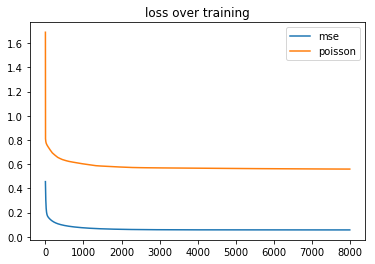

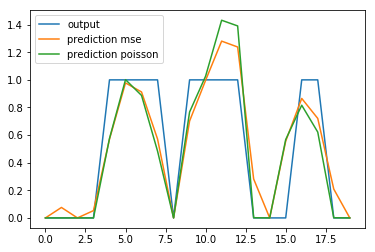

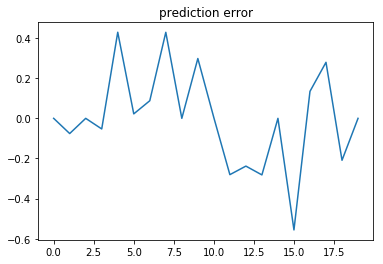

In [79]:
predicted = model.predict(X)
predicted2 = model2.predict(X)

#Compare out and predicted
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
plt.legend(('mse','poisson'))
plt.title('loss over training')

plt.figure()
plt.plot(Y[0,:,0])
plt.plot(predicted[0,:,0])
plt.plot(predicted2[0,:,0])
plt.legend(('output','prediction mse','prediction poisson'))
    
plt.figure()
plt.plot(Y[0,:,0]-predicted[0,:,0])
plt.title('prediction error')